# Vehicle Dynamics Simulator
**Contributors:** Shengfan Cao, Edward Zhu, Thomas Fork.

##Clone repository and Install Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
if "dependencies_installed" not in globals():
    !git clone https://github.com/MPC-Berkeley/barc_gym.git --depth 1
    !pip install -r barc_gym/requirements.txt
    !pip install -e barc_gym/gym-carla
    !pip install -e barc_gym/mpclab_common
    !pip install -e barc_gym/mpclab_controllers
    !pip install -e barc_gym/mpclab_simulation
    dependencies_installed = True

fatal: destination path 'barc_gym' already exists and is not an empty directory.


Obtaining file:///C:/Users/matth/Downloads/barc_gym/gym-carla
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: gym_carla
    Found existing installation: gym_carla 0.0.1
    Uninstalling gym_carla-0.0.1:
      Successfully uninstalled gym_carla-0.0.1
  Running setup.py develop for gym_carla


  DEPRECATION: Legacy editable install of gym_carla==0.0.1 from file:///C:/Users/matth/Downloads/barc_gym/gym-carla (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


Obtaining file:///C:/Users/matth/Downloads/barc_gym/mpclab_common
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mpclab_common
    Found existing installation: mpclab_common 0.1
    Uninstalling mpclab_common-0.1:
      Successfully uninstalled mpclab_common-0.1
  Running setup.py develop for mpclab_common


  DEPRECATION: Legacy editable install of mpclab_common==0.1 from file:///C:/Users/matth/Downloads/barc_gym/mpclab_common (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


Obtaining file:///C:/Users/matth/Downloads/barc_gym/mpclab_controllers
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mpclab_controllers
    Found existing installation: mpclab_controllers 0.1
    Uninstalling mpclab_controllers-0.1:
      Successfully uninstalled mpclab_controllers-0.1
  Running setup.py develop for mpclab_controllers


  DEPRECATION: Legacy editable install of mpclab_controllers==0.1 from file:///C:/Users/matth/Downloads/barc_gym/mpclab_controllers (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


Obtaining file:///C:/Users/matth/Downloads/barc_gym/mpclab_simulation
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mpclab_simulation
    Found existing installation: mpclab_simulation 0.1
    Uninstalling mpclab_simulation-0.1:
      Successfully uninstalled mpclab_simulation-0.1
  Running setup.py develop for mpclab_simulation


  DEPRECATION: Legacy editable install of mpclab_simulation==0.1 from file:///C:/Users/matth/Downloads/barc_gym/mpclab_simulation (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


In [3]:
import site
import warnings
site.main()
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
import numpy as np
import gymnasium as gym
import gym_carla
from matplotlib import pyplot as plt
from loguru import logger
import casadi as ca

#Instructions

##Introduction
For your final project, you will design a controller to race a BARC (Berkeley Autonomous Race Car) around the track in the MPC Lab.

This will be done in two parts

*   First you will compute the optimal raceline that minimizes the lap time for a car to race around the track with the inputs of steering and acceleration and references of speed and centerline offset.
*   You will then design PID controllers for steering and acceleration to follow that raceline.

Your goal is to acheive the fastest lap time (you can chose which lap, for example if your lap 3 is faster than lap 1 or lap 2, your fastest lap time is from lap 3).



##Instructions for Computing the Raceline
The optimization method for computing your raceline is provided. The raceline is given in terms of

*   s (curvilinear abscissa)  
*   ey (lateral offset from centerline as a function of s)
*   vx (longitudinal velocity as a function of s)
*   vy (lateral velocity as a function of s)
*   epsi_dot (heading angle rate of change as a function of s)
*   epsi (heading angle as a function of s)
*   t (time as a function of s)
*   u0 (acceleration input as a function of s)
*   u1 (steering input as a function of s)

Your task is to adjust the parameters in the optimization to achieve your desired raceline. It is also recommended that you edit the track tightening and the speed scaling. Keep in mind that the implemented vehicle model may not exaclty represent the actual vehicle being used. These can be found in the code under the following comments:
```
###[1] Parameters, ###[2] Track Tightening, and ###[3] Speed Scaling  
```
The optimization process will take a few minutes (this should take less than 200 iterations). After it is over, your optimal raceline will be automatically saved into the Colab environment as well as on your machine as an NPZ file with the values of s, ey, vx, vy, epsi_dot, epsi, t, u0, and u1.








##Instructions for Creating the PID Controllers

You will have to create two PID controllers to follow the raceline computed. One for speed control and one for path following. Your inputs will be longitudinal acceleration and steering angle. You will modify the `solve()` method inside the `PIDRacelineFollower` class.

You can find a similar Colab notebook in Ed Discussions where the car is following a raceline that has the track centerline as the path reference and a constant velocity of 1 m/s as the speed reference.

Your NPZ file containing the raceline will be loaded with all of the states stored into a dictionary. Your task is to tune the PID parameters and implement the control logic that will have the car follow your reference path and speed around the track.

PID gains can be changed under Tuning the Gains and the control logic can be implemented in the step function found at
```
###[4] Control Logic
```

#Computing the Raceline

##Dependencies

In [8]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.5 MB 4.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.5 MB 4.9 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/11.5 MB 5.2 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.5 MB 5.0 MB/s eta 0:00:02
   --------------------- ------------------ 6.3/11.5 MB 5.2 MB/s eta 0:00:02
   -------------------------- ------------- 7.6/11.5 MB 5.3 MB/s eta 0:00:01
   ------------------------------ --------- 8.7/11.5 MB 5.4 MB/s eta 0:00:01
   -------------------------------- ------- 9.4/11.5 MB 5.3 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 5.0 MB/s eta 0:00:00

  

In [5]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  !apt-get install -y -qq glpk-utils
  !wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
  !unzip -o -q ipopt-linux64

##Parameters and Vehicle Dynamics

In [6]:
# Original code at: https://github.com/MPC-Berkeley/barc_gym/blob/main/mpclab_common/mpclab_common/tracks/solve_raceline.py

import numpy as np
from pyomo.environ import *
from pyomo.dae import *
import pandas as pd

from mpclab_common.pytypes import BodyAngularVelocity, BodyLinearVelocity, ParametricPose, VehicleState, VehicleActuation

def compute_raceline(track, vehicle_config, vehicle_constraints,
                     obj_num=0,
                     raceline_to_avoid=None,
                     track_tightening=0,
                     constant_width=False):

    #SYSTEM STATES:  vx=x[0],  vy=x[1], wz=x[2] ,e_psi=x[3], t=x[4], e_y=x[5]
    #SYSTEM INPUTS:  ax[m/s^2]=u0, steering(rad)=u1
    #INDEPENDENT VARIABLE IS s (space)

    lf = vehicle_config.wheel_dist_front
    lr = vehicle_config.wheel_dist_rear

    mass = vehicle_config.mass
    Iz = vehicle_config.yaw_inertia

    tire_model = vehicle_config.tire_model

    mu = vehicle_config.wheel_friction
    Br = vehicle_config.pacejka_b_rear
    Bf = vehicle_config.pacejka_b_front
    Cr = vehicle_config.pacejka_c_rear
    Cf = vehicle_config.pacejka_c_front
    Dr = vehicle_config.pacejka_d_rear
    Df = vehicle_config.pacejka_d_front

    xu_ub = vehicle_constraints['xu_ub']
    xu_lb = vehicle_constraints['xu_lb']
    du_ub = vehicle_constraints['du_ub']
    du_lb = vehicle_constraints['du_lb']

###[1] Parameters for optimization

    v_long_max = xu_ub.v.v_long
    v_long_min = xu_lb.v.v_long
    v_tran_max = xu_ub.v.v_tran
    v_tran_min = xu_lb.v.v_tran
    psidot_max = xu_ub.w.w_psi
    psidot_min = xu_lb.w.w_psi
    e_psi_max = xu_ub.p.e_psi
    e_psi_min = xu_lb.p.e_psi
    if constant_width:
        e_y_max = track.half_width - track_tightening
        e_y_min = -(track.half_width - track_tightening)
    else:
        # e_y_max = xu_ub.p.x_tran
        # e_y_min = xu_lb.p.x_tran
        e_y_max = 1e9
        e_y_min = -1e9

    a_max = xu_ub.u.u_a
    a_min = xu_lb.u.u_a
    steer_max = xu_ub.u.u_steer
    steer_min = xu_lb.u.u_steer

    a_rate_max = du_ub.u_a
    a_rate_min = du_lb.u_a
    steer_rate_max = du_ub.u_steer
    steer_rate_min = du_lb.u_steer

    print('=================== Raceline computation ===================')
    if track.circuit:
        print('Track is a circuit')
    else:
        print('Track is not a circuit')
    if constant_width:
        print('Using constant width')
    else:
        print('Using varying width')

    print('Vehicle configuration:')
    print('     - center of mass to front axle: %g m' % lf)
    print('     - center of mass to rear axle: %g m' % lr)
    print('     - mass: %g kg' % mass)
    print('     - yaw inertia: %g kg m^2' % Iz)
    print('     - tire model: %s' % tire_model)
    print('     - tire friction coefficient: %g' % mu)
    print('     - Front tires:')
    print('         - B: %g' % Bf)
    print('         - C: %g' % Cf)
    print('         - D: %g' % Df)
    print('     - Rear tires:')
    print('         - B: %g' % Br)
    print('         - C: %g' % Cr)
    print('         - D: %g' % Dr)
    print('Vehicle input constraints:')
    print('     - max acceleration: %g m/s^2' % a_max)
    print('     - min acceleration: %g m/s^2' % a_min)
    print('     - max steering angle: %g rad' % steer_max)
    print('     - min steering angle: %g rad' % steer_min)
    print('Vehicle state constraints:')
    print('     - max longitudinal velocity: %g m/s' % v_long_max)
    print('     - min longitudinal velocity: %g m/s' % v_long_min)
    print('     - max lateral velocity: %g m/s' % v_tran_max)
    print('     - min lateral velocity: %g m/s' % v_tran_min)
    print('     - max yaw rate: %g rad/s' % psidot_max)
    print('     - min yaw rate: %g rad/s' % psidot_min)
    print('============================================================')

    m = ConcreteModel()
    m.sf = Param(initialize=track.track_length)
    m.s = ContinuousSet(bounds=(0, m.sf))

    m.alpha_f   = Var(m.s, initialize=0)
    m.alpha_r   = Var(m.s, initialize=0)
    m.Fyf       = Var(m.s,bounds=(-mass*9.8, mass*9.8), initialize=0)
    m.Fyr       = Var(m.s,bounds=(-mass*9.8, mass*9.8), initialize=0)
    m.x0        = Var(m.s, bounds=(v_long_min, v_long_max), initialize=v_long_min)
    m.x1        = Var(m.s, bounds=(v_tran_min, v_tran_max), initialize=0)
    m.x2        = Var(m.s, bounds=(psidot_min, psidot_max), initialize=0)
    m.x3        = Var(m.s, bounds=(e_psi_min, e_psi_max))
    m.x4        = Var(m.s, bounds=(0, 20000), initialize=0)
    m.x5        = Var(m.s, bounds=(e_y_min, e_y_max), initialize=0)
    m.u0        = Var(m.s, bounds=(a_min, a_max), initialize=0)
    m.u1        = Var(m.s, bounds=(steer_min, steer_max), initialize=0)
    m.du0       = Var(m.s, bounds=(a_rate_min, a_rate_max), initialize=0)
    m.du1       = Var(m.s, bounds=(steer_rate_min, steer_rate_max), initialize=0)

    m.dx0ds = DerivativeVar(m.x0, wrt=m.s)
    m.dx1ds = DerivativeVar(m.x1, wrt=m.s)
    m.dx2ds = DerivativeVar(m.x2, wrt=m.s)
    m.dx3ds = DerivativeVar(m.x3, wrt=m.s)
    m.dx4ds = DerivativeVar(m.x4, wrt=m.s)
    m.dx5ds = DerivativeVar(m.x5, wrt=m.s)
    m.du0ds = DerivativeVar(m.u0, wrt=m.s)
    m.du1ds = DerivativeVar(m.u1, wrt=m.s)

    # to avoid divide by 0
    eps=0.000001

    #Objective function
    if obj_num == 0:
        m.obj = Objective(expr=m.x4[m.sf], sense=minimize)
    elif obj_num == 1:
        m.obj = Objective(expr=m.x4[m.sf] + 0.1*sum(m.du1ds[i] for i in m.s), sense=minimize)
    elif obj_num == 2:
        m.obj = Objective(expr=m.x4[m.sf] + 0.01*sum(m.du1ds[i] for i in m.s), sense=minimize)
    elif obj_num == 3:
        m.obj = Objective(expr=m.x4[m.sf] + 0.001*sum(m.du1ds[i] for i in m.s), sense=minimize)
    elif obj_num == 4:
        m.obj = Objective(expr=m.x4[m.sf] + 0.005*sum(m.du1ds[i] for i in m.s), sense=minimize)
    elif obj_num == 5:
        # Penalized lap time, inputs, and input rates
        m.obj = Objective(expr=m.x4[m.sf] + 0.01*sum(m.du0ds[i]**2 for i in m.s) + 0.01*sum(m.du1ds[i]**2 for i in m.s), sense=minimize)

    #sideslip and lateral force
    def _alphafc(m, s):
        return m.alpha_f[s] == m.u1[s] - atan((m.x1[s] + lf * m.x2[s])/ (m.x0[s]))
    m.c4 = Constraint(m.s, rule=_alphafc)
    def _alpharc(m, s):
        return m.alpha_r[s] == -atan((m.x1[s] - lr * m.x2[s])/ (m.x0[s]))
    m.c3 = Constraint(m.s, rule=_alpharc)

    if tire_model == 'linear':
        def _Fyfc(m, s):
            return m.Fyf[s] ==  Df * Cf * Bf * m.alpha_f[s]
        m.c2 = Constraint(m.s, rule=_Fyfc)
        def _Fyrc(m, s):
            return m.Fyr[s] ==  Dr * Cr * Br * m.alpha_r[s]
        m.c1 = Constraint(m.s, rule=_Fyrc)
    elif tire_model == 'pacejka':
        def _Fyfc(m, s):
            return m.Fyf[s] ==  Df * sin(Cf * atan(Bf * m.alpha_f[s]))
        m.c2 = Constraint(m.s, rule=_Fyfc)
        def _Fyrc(m, s):
            return m.Fyr[s] ==  Dr * sin(Cr * atan(Br * m.alpha_r[s]))
        m.c1 = Constraint(m.s, rule=_Fyrc)

    #Differential model definition
    def _x0dot(m, s):
        cur = track.get_curvature(s)
        return m.dx0ds[s] == (m.u0[s] - 1 / mass *  m.Fyf[s] * sin(m.u1[s]) + m.x2[s]*m.x1[s])*((1 - cur * m.x5[s]) /(eps+m.x0[s] * cos(m.x3[s]) - m.x1[s] * sin(m.x3[s])))
    m.x0dot = Constraint(m.s, rule=_x0dot)

    def _x1dot(m, s):
        cur = track.get_curvature(s)
        return m.dx1ds[s] == (1 / mass * (m.Fyf[s] * cos(m.u1[s]) + m.Fyr[s]) - m.x2[s] * m.x0[s])*((1 - cur * m.x5[s]) /(eps+m.x0[s] * cos(m.x3[s]) - m.x1[s] * sin(m.x3[s])))
    m.x1dot = Constraint(m.s, rule=_x1dot)

    def _x2dot(m, s):
        cur = track.get_curvature(s)
        return m.dx2ds[s] == (1 / Iz *(lf*m.Fyf[s] * cos(m.u1[s]) - lr * m.Fyr[s]) )*((1 - cur * m.x5[s]) /(eps+m.x0[s] * cos(m.x3[s]) - m.x1[s] * sin(m.x3[s])))
    m.x2dot = Constraint(m.s, rule=_x2dot)

    def _x3dot(m, s):
        cur = track.get_curvature(s)
        return m.dx3ds[s] == ( m.x2[s]*(1 - cur * m.x5[s])/(eps+m.x0[s] * cos(m.x3[s]) - m.x1[s] * sin(m.x3[s])) - cur)
    m.x3dot = Constraint(m.s, rule=_x3dot)

    def _x4dot(m, s):
        cur = track.get_curvature(s)
        return m.dx4ds[s] == ((1 - cur * m.x5[s]) /(eps+m.x0[s] * cos(m.x3[s]) - m.x1[s] * sin(m.x3[s])))
    m.x4dot = Constraint(m.s, rule=_x4dot)

    def _x5dot(m, s):
        cur = track.get_curvature(s)
        return m.dx5ds[s] == (m.x0[s] * sin(m.x3[s]) + m.x1[s] * cos(m.x3[s]))*((1 - cur * m.x5[s]) /(eps+m.x0[s] * cos(m.x3[s]) - m.x1[s] * sin(m.x3[s])))
    m.x5dot = Constraint(m.s, rule=_x5dot)

    def _u0dot(m, s):
        cur = track.get_curvature(s)
        return m.du0ds[s] == m.du0[s] * ((1 - cur * m.x5[s]) /(eps+m.x0[s] * cos(m.x3[s]) - m.x1[s] * sin(m.x3[s])))
    m.u0dot = Constraint(m.s, rule=_u0dot)

    def _u1dot(m, s):
        cur = track.get_curvature(s)
        return m.du1ds[s] == m.du1[s] * ((1 - cur * m.x5[s]) /(eps+m.x0[s] * cos(m.x3[s]) - m.x1[s] * sin(m.x3[s])))
    m.u1dot = Constraint(m.s, rule=_u1dot)

    # Variable track width
    if not constant_width:
        def _eymax(m, s):
            _w = float(track.left_width(s)) - track_tightening
            return m.x5[s] <= _w
        m.eymax = Constraint(m.s, rule=_eymax)
        def _eymin(m, s):
            _w = -(float(track.right_width(s)) - track_tightening)
            return m.x5[s] >= _w
        m.eymin = Constraint(m.s, rule=_eymin)


    if raceline_to_avoid is not None:
        # racing constraints: t2(s) + ey2(s) >= t1(s) + ey1(s) + buffer
        buffer = 0.5
        def _raceConstraint(m,s):
            m1x4, m1x5 = getValues(raceline_to_avoid, s)
            return m.x5[s]+m1x4 <= m1x5 + m.x4[s] - 0.1

        m.rc = Constraint(m.s, rule=_raceConstraint)

    # inital and terminal conditions
    def _init(m):
        if track.circuit:
            yield m.x0[0] == m.x0[track.track_length]
            yield m.x1[0] == m.x1[track.track_length]
            yield m.x2[0] == m.x2[track.track_length]
            yield m.x3[0] == m.x3[track.track_length]
            yield m.x5[0] == m.x5[track.track_length]
        yield m.x4[0] == 0

    m.init_conditions = ConstraintList(rule=_init)

    # Discretize model using radau or finite difference collocation
    TransformationFactory('dae.collocation').apply_to(m, nfe=200, ncp=10, scheme='LAGRANGE-LEGENDRE') #STANDARD METHOD

    # Solve algebraic model
    solver = SolverFactory('ipopt')
    # Solver options
    solver.options['max_iter'] = 1000
    solver.options = {'tol': 1e-2,
                      'mu_init': 1e-6}
    results = solver.solve(m, tee=True)

    # Evaluate solution at discretization points
    s_vec = list(sorted(m.s.data()))

    raceline = {'t': np.zeros(len(s_vec)),
                'x' : np.zeros(len(s_vec)),
                'y' : np.zeros(len(s_vec)),
                'psi' : np.zeros(len(s_vec)),
                's' : np.zeros(len(s_vec)),
                'e_y' : np.zeros(len(s_vec)),
                'e_psi' : np.zeros(len(s_vec)),
                'v_long' : np.zeros(len(s_vec)),
                'v_tran' : np.zeros(len(s_vec)),
                'psidot' : np.zeros(len(s_vec)),
                'u_a': np.zeros(len(s_vec)),
                'u_s': np.zeros(len(s_vec))}

    for j in range(len(s_vec)):
        s = s_vec[j]

        local_pos = (s, value(m.x5[s]), 0)
        (x, y, psi) = track.local_to_global(local_pos)

        raceline['t'][j]        = value(m.x4[s])
        raceline['v_long'][j]   = value(m.x0[s])
        raceline['v_tran'][j]   = value(m.x1[s])
        raceline['psidot'][j]   = value(m.x2[s])
        raceline['s'][j]        = s
        raceline['e_y'][j]      = value(m.x5[s])
        raceline['e_psi'][j]    = value(m.x3[s])
        raceline['x'][j]        = x
        raceline['y'][j]        = y
        raceline['psi'][j]      = psi
        raceline['u_a'][j]      = value(m.u0[s])
        raceline['u_s'][j]      = value(m.u1[s])

    DF = pd.DataFrame()

    return raceline, DF

def getValues(DF, s):
    m1x4 = np.interp(s, DF.index, DF['x4'].values)
    m1x5 = np.interp(s, DF.index, DF['x5'].values)

    return m1x4, m1x5

def plot_racelines(track, racelines, colors):
    import matplotlib.pyplot as plt
    import os

    fig_xy = plt.figure(figsize=(20, 20))
    ax = fig_xy.gca()
    track.plot_map(ax)

    fig_ts = plt.figure(figsize=(50, 30))
    ax_vx = fig_ts.add_subplot(6, 1, 1)
    ax_vx.set_ylabel('vel long')
    ax_vy = fig_ts.add_subplot(6, 1, 2)
    ax_vy.set_ylabel('vel lat')
    ax_pd = fig_ts.add_subplot(6, 1, 3)
    ax_pd.set_ylabel('yaw rate')
    ax_ey = fig_ts.add_subplot(6, 1, 4)
    ax_ey.set_ylabel('e_y')
    ax_a = fig_ts.add_subplot(6, 1, 5)
    ax_a.set_ylabel('accel cmd')
    ax_s = fig_ts.add_subplot(6, 1, 6)
    ax_s.set_ylabel('steer cmd')
    ax_s.set_xlabel('s')

    for r, c in zip(racelines, colors):
        vs = np.cos(r['v_long']) - np.sin(r['v_tran'])
        speed = np.sqrt(np.power(r['v_long'],2)+np.power(r['v_tran'],2))
        sc = ax.scatter(r['x'], r['y'], c=speed)
        ax.plot(r['x'], r['y'], c)

        ax_vx.plot(r['s'], r['v_long'], c)
        ax_vy.plot(r['s'], r['v_tran'], c)
        ax_pd.plot(r['s'], r['psidot'], c)
        ax_ey.plot(r['s'], r['e_y'], c)
        ax_a.plot(r['s'], r['u_a'], c)
        ax_s.plot(r['s'], r['u_s'], c)

        laptime = r['t'][-1]
        print(f'Lap time: {laptime}')

    ax.set_aspect('equal')
    plt.colorbar(mappable=sc, ax=ax)
    ax.set_title(f'time: {laptime:.2f} s')

    save_plot = False
    if save_plot:
        fig_xy.savefig(os.path.join(os.path.expanduser('~'), 'Pictures', 'raceline.png'))
        fig_ts.savefig(os.path.join(os.path.expanduser('~'), 'Pictures', 'raceline_state_input.png'))

    plt.draw()
    plt.show()

def extract_initial_state(dic):
    return np.array([dic.x.x, dic.x.y, dic.e.psi, dic.v.v_long])


def extract_cmd_actual_steer(dic):
    return np.array([dic.u.usteer,dic.hw.steering])


##Optimization

In [10]:
conda install -c conda-forge casadi


Channels:
Note: you may need to restart the kernel to use updated packages.

 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\matth\miniconda3

  added / updated specs:
    - casadi


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ampl-asl-1.0.0             |       he0c23c2_2         399 KB  conda-forge
    casadi-3.7.0               |  py312h226cf95_2         5.3 MB  conda-forge
    intel-openmp-2024.2.1      |    h57928b3_1083         1.8 MB  conda-forge
    ipopt-3.14.17              |       h812a801_2         918 KB  conda-forge
    libblas-3.9.0              |  31_h641d27c_mkl         3.6 MB  conda-forge
    libcblas-3.9.0             |  31_h5e41251_mkl         3.6 MB  conda-forge
    libhwloc-2.11.2            |default_ha69328c_1001         2.3 MB  conda-forge
    liblapack-3.9.0            | 

=================== Raceline computation ===================
Track is a circuit
Using constant width
Vehicle configuration:
     - center of mass to front axle: 0.132 m
     - center of mass to rear axle: 0.128 m
     - mass: 2.258 kg
     - yaw inertia: 0.02771 kg m^2
     - tire model: pacejka
     - tire friction coefficient: 0.9
     - Front tires:
         - B: 5
         - C: 2.28
         - D: 9.81459
     - Rear tires:
         - B: 5.57506
         - C: 2.05247
         - D: 10.1213
Vehicle input constraints:
     - max acceleration: 2 m/s^2
     - min acceleration: -2 m/s^2
     - max steering angle: 0.436 rad
     - min steering angle: -0.436 rad
Vehicle state constraints:
     - max longitudinal velocity: 3 m/s
     - min longitudinal velocity: 0.1 m/s
     - max lateral velocity: 1 m/s
     - min lateral velocity: -1 m/s
     - max yaw rate: 10 rad/s
     - min yaw rate: -10 rad/s
Ipopt 3.14.17: tol=0.01
mu_init=1e-06


*****************************************************

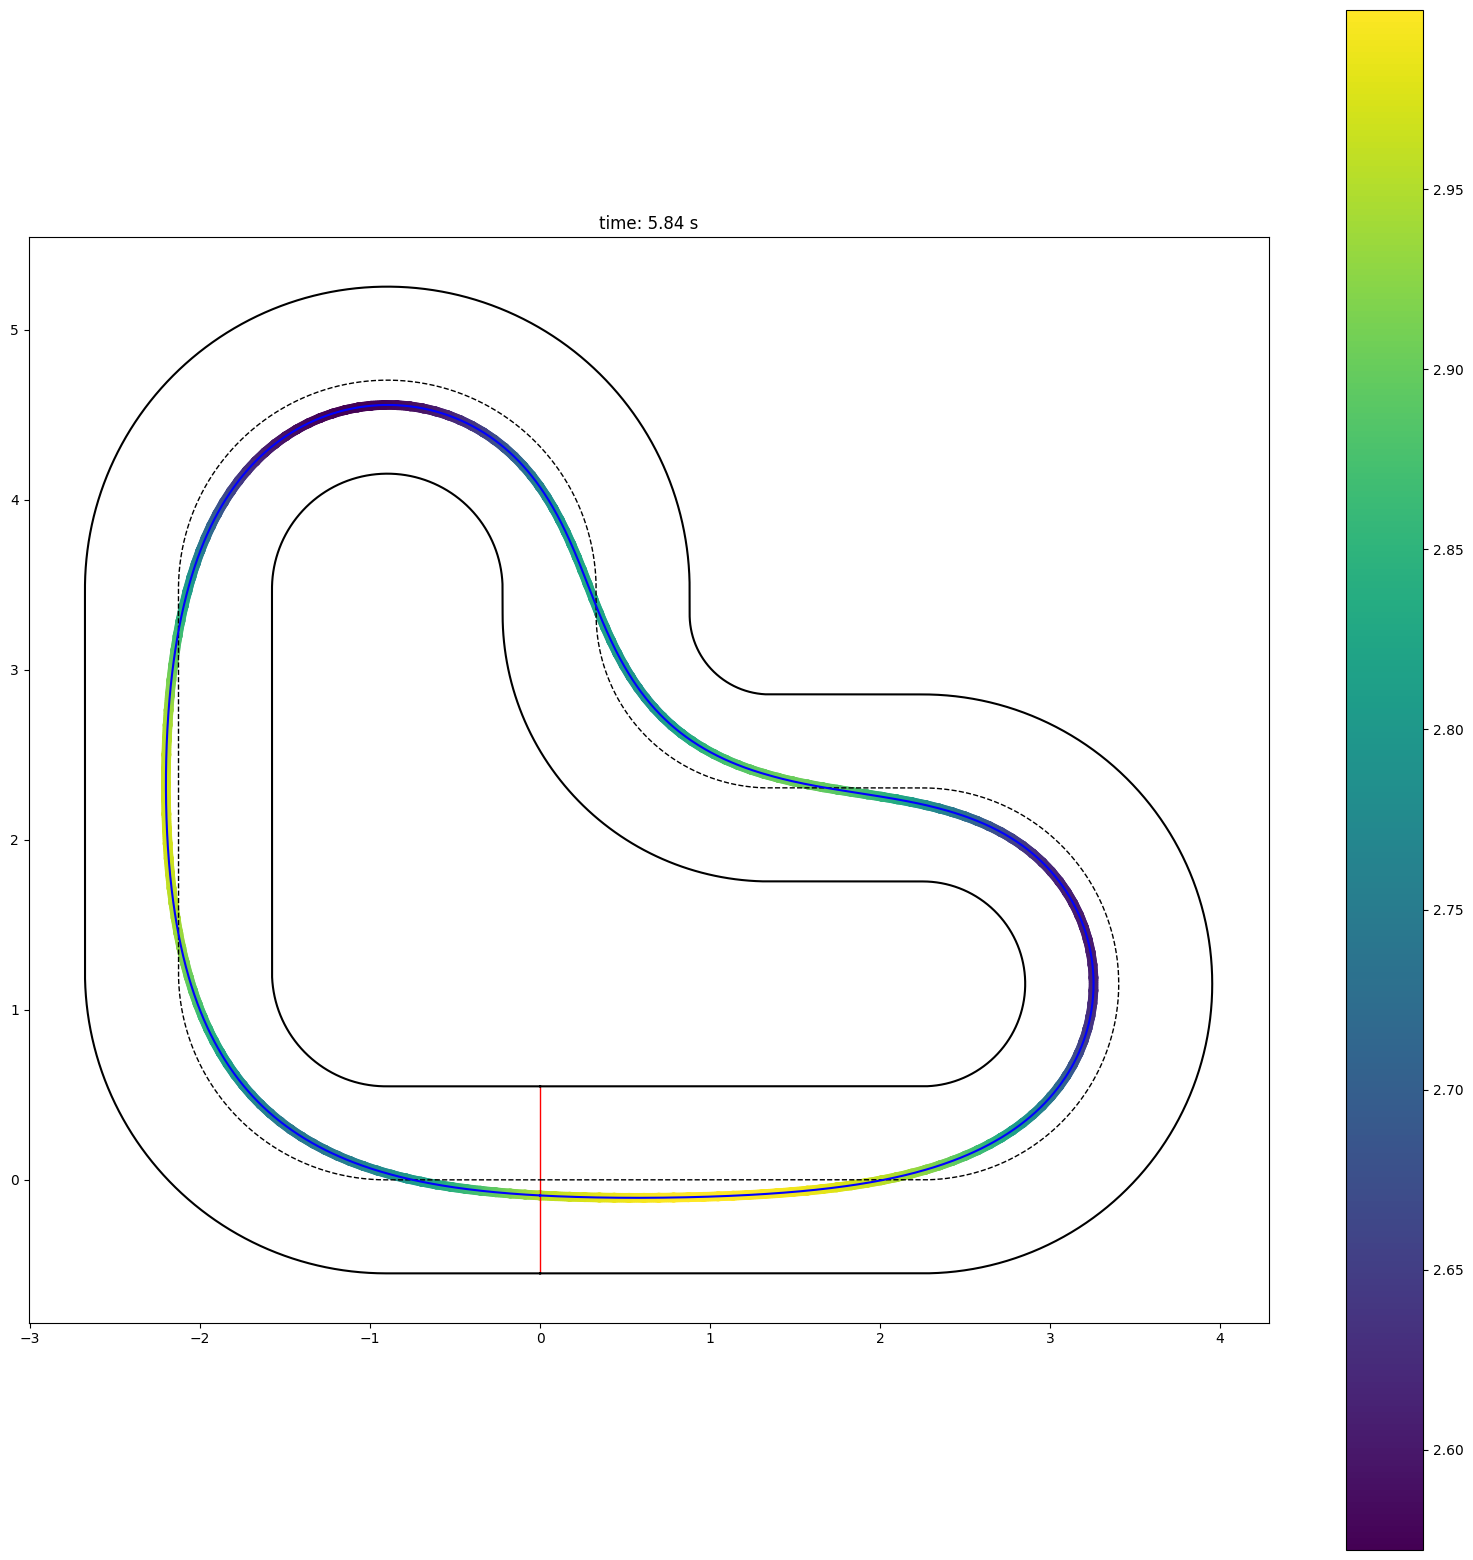

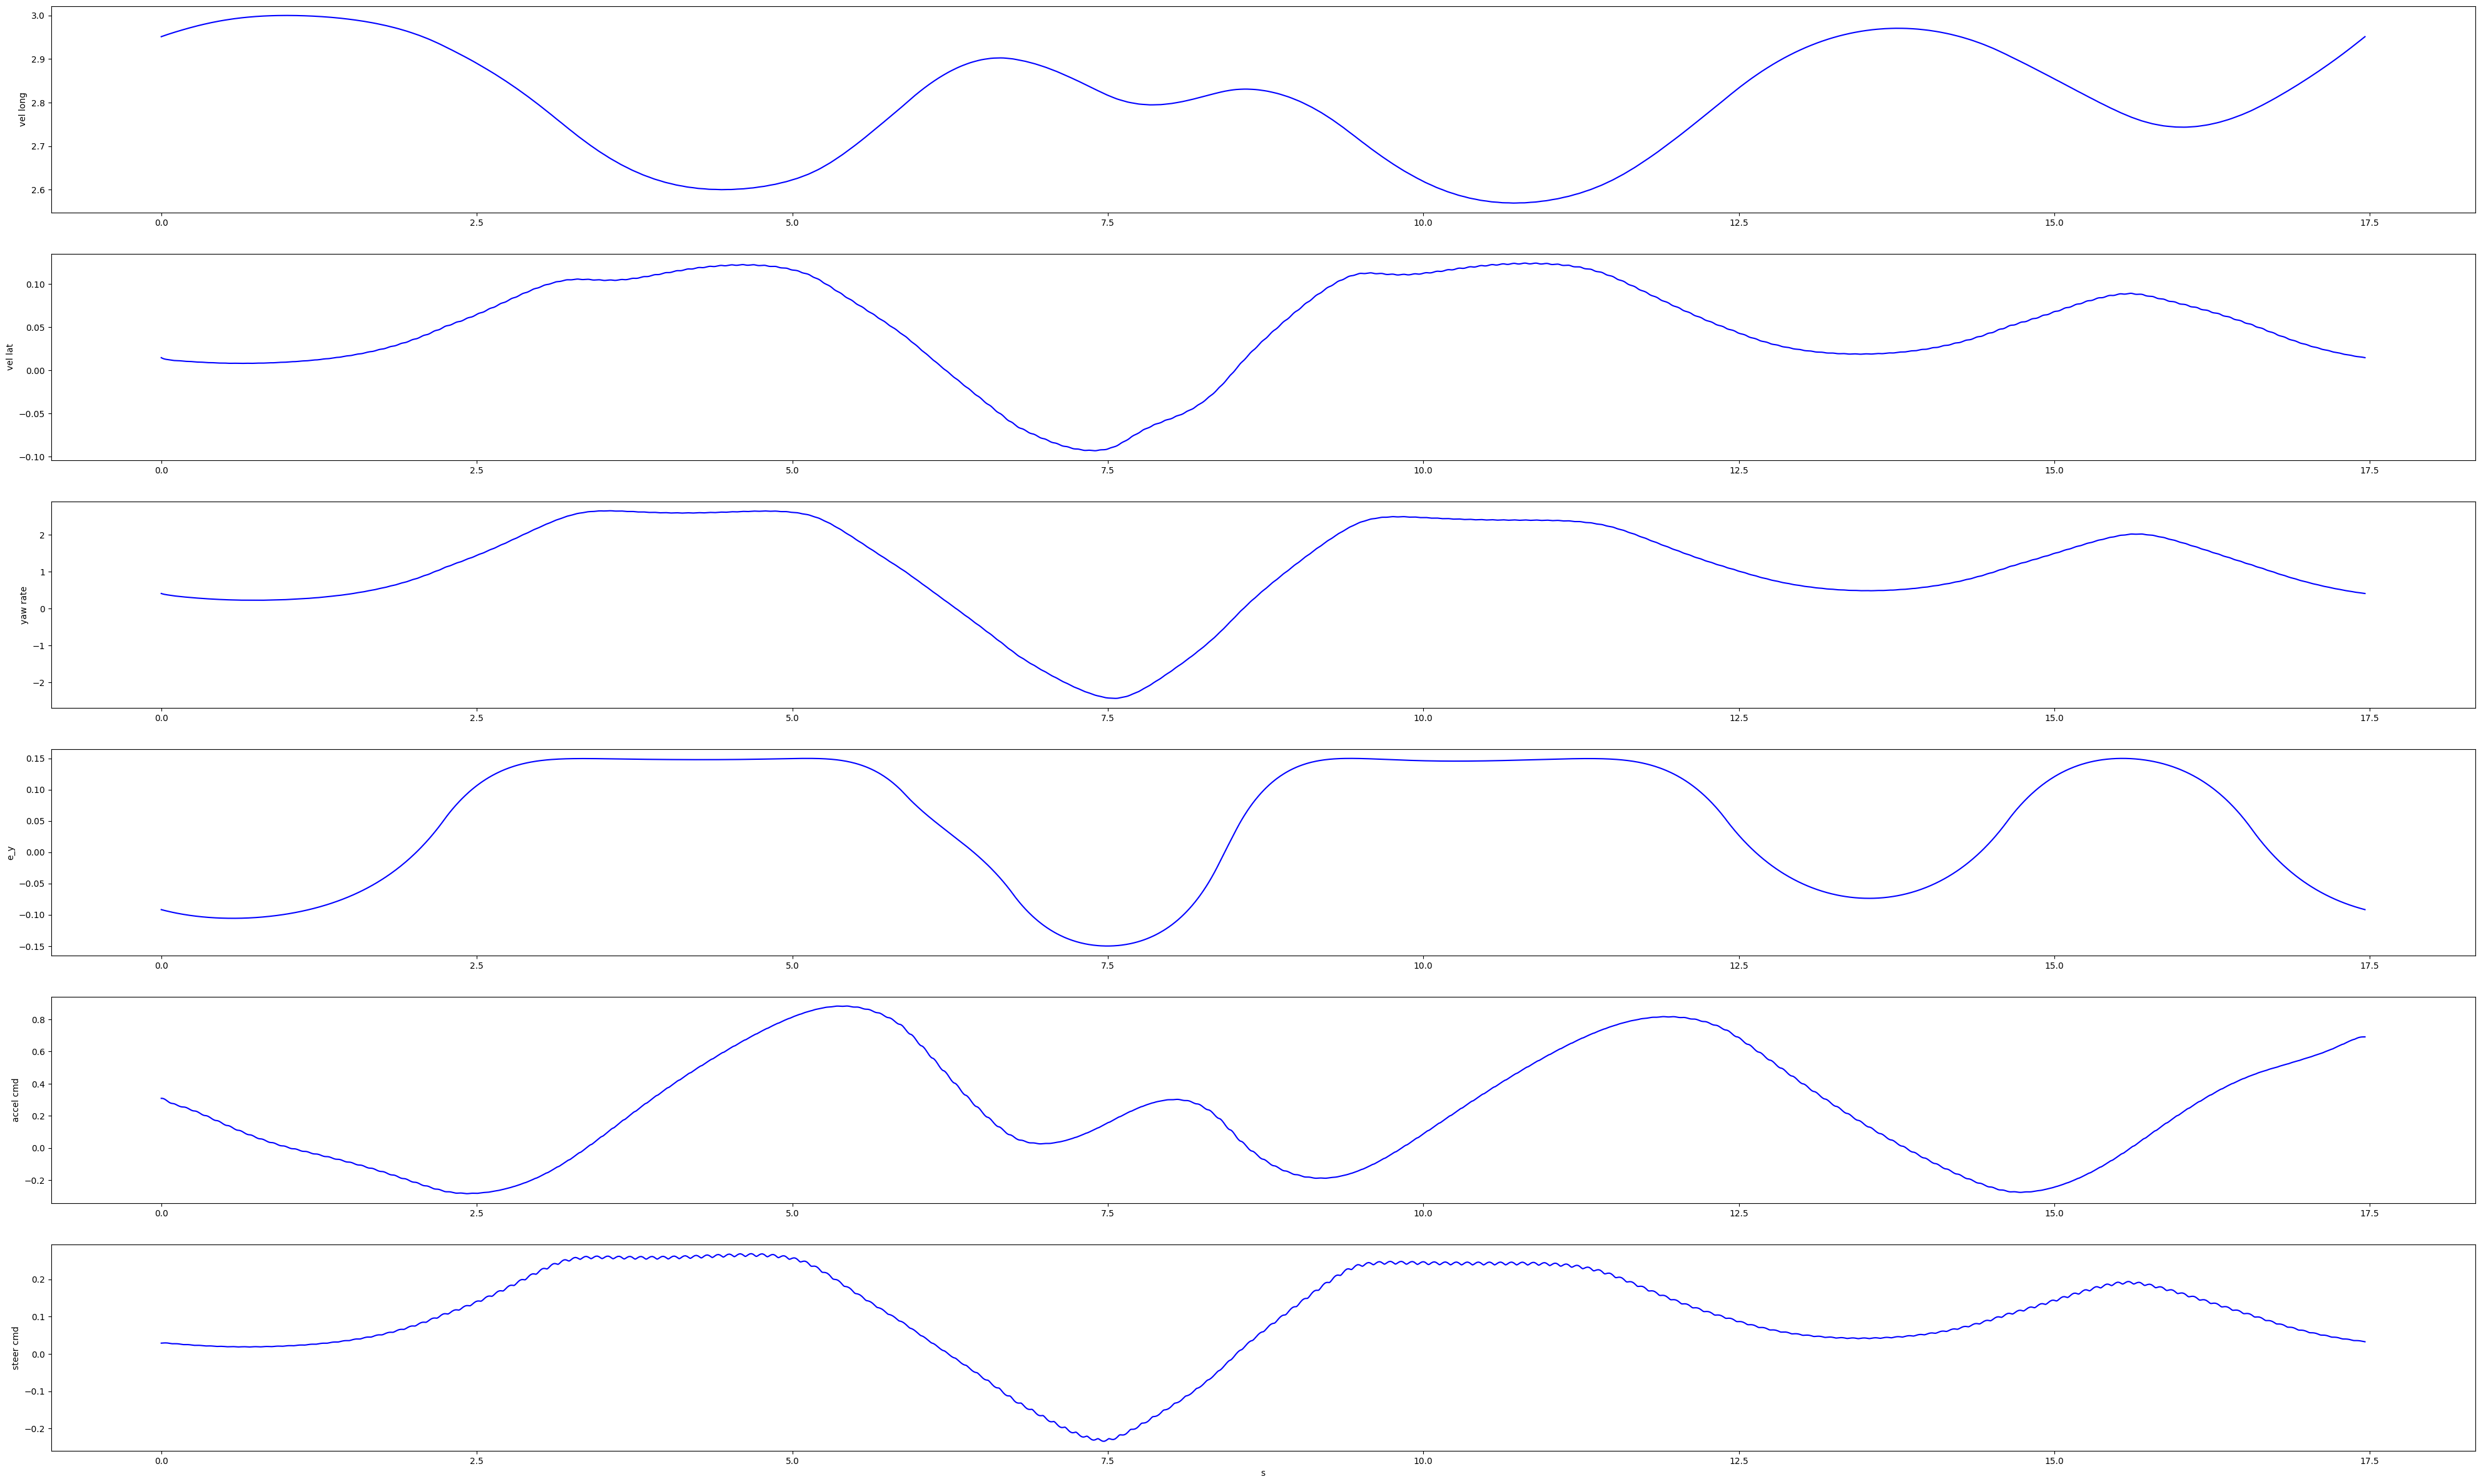

In [8]:
#from google.colab import files
import numpy as np
import os
from mpclab_common.models.model_types import DynamicBicycleConfig
from mpclab_common.track import get_track

track_name = 'L_track_barc'
track_obj = get_track(track_name)

vehicle_config = DynamicBicycleConfig(wheel_dist_front=0.132,
                                    wheel_dist_rear=0.128,
                                    mass=2.258,
                                    yaw_inertia=0.02771,
                                    drag_coefficient=0.0,
                                    tire_model='pacejka',
                                    wheel_friction=0.9,
                                    pacejka_b_front=5.0,
                                    pacejka_b_rear=5.575055782097995,
                                    pacejka_c_front=2.28,
                                    pacejka_c_rear=2.0524659447890445,
                                    simple_slip=False)

###[2] Track Tightening (default is vehicle width)
# VW = 0.4
VW = 0.8
track_tightening = VW/2

state_input_ub = VehicleState(p=ParametricPose(x_tran=1e9, e_psi=np.pi/2),
                                v=BodyLinearVelocity(v_long=3, v_tran=1),
                                w=BodyAngularVelocity(w_psi=10),
                                u=VehicleActuation(u_a=2.0, u_steer=0.436))
state_input_lb = VehicleState(p=ParametricPose(x_tran=-1e9, e_psi=-np.pi/2),
                                v=BodyLinearVelocity(v_long=0.1, v_tran=-1),
                                w=BodyAngularVelocity(w_psi=-10),
                                u=VehicleActuation(u_a=-2.0, u_steer=-0.436))
input_rate_ub = VehicleActuation(u_a=40, u_steer=4.5)
input_rate_lb = VehicleActuation(u_a=-40, u_steer=-4.5)
vehicle_constraints = {'xu_ub': state_input_ub, 'xu_lb': state_input_lb, 'du_ub': input_rate_ub, 'du_lb': input_rate_lb}

obj_num = 0
raceline_1, raceline_data = compute_raceline(track_obj, vehicle_config, vehicle_constraints,
                                                obj_num=obj_num,
                                                track_tightening=track_tightening,
                                                constant_width=True)

plot = True
save = True

if save:
    filename = 'raceline_group_7.npz'
    save_path = filename
    print('Saving computed raceline to %s' % save_path)
    np.savez(save_path, **raceline_1)
    #files.download(save_path)

if plot:
    plot_racelines(track_obj, [raceline_1], ['b'])

#Creating the PID Controllers

##Load raceline NPZ file and create a dictionary of the states

In [9]:
import numpy as np
import os
#from google.colab import files


class Raceline:
    def __init__(self, raceline_file='raceline_group_7.npz'):
        while not os.path.exists(raceline_file):
            input(f"Raceline data file '{raceline_file}' not found. Please place it in the working directory and press Enter to retry...")
            #uploaded = files.upload()
        data = np.load(raceline_file)
        self.s, self.ey, self.epsi, self.vx, self.vy, self.epsi_dot, self.t, self.u0, self.u1 = map(np.array, (data['s'], data['e_y'], data['e_psi'], data['v_long'], data['v_tran'], data['psidot'], data['t'], data['u_a'], data['u_s']))
        self.x, self.y, self.psi = map(np.array, (data['x'], data['y'], data['psi']))

        # raw_psi = data['psi']        # this is modulo-2π
        # self.psi = np.unwrap(raw_psi)  # now ψ will run 0→2π→2π+… instead of jumping back


    def get_MPC_reference(self, _s, model, v0):

        # v0 = v_long_ref = np.interp(_s, self.s, self.vx)

        s_ref_list = [_s + v0 * model.dt]
        ref_state_list = []

        for i in range(model.N):
            # compute reference for current s
            x_ref = np.interp(s_ref_list[-1], self.s, self.x)
            y_ref = np.interp(s_ref_list[-1], self.s, self.y)
            psi_ref = np.interp(s_ref_list[-1], self.s, self.psi)
            v_long_ref = np.interp(s_ref_list[-1], self.s, self.vx) # get speed from raceline

            # if psi_ref < 0:
            #     # print ("psi_ref < 0, psi_ref is",psi_ref )
            #     psi_ref += 2*np.pi

            ref_state_list.append([x_ref, y_ref, psi_ref, v_long_ref])

            if len(s_ref_list) <= model.N:
              # compute new s
              s_delta = v_long_ref*0.8 * model.dt
              s_ref_list.append(s_ref_list[-1] + s_delta)

        return np.array(ref_state_list).T


    def get_reference(self, _s, speed_scaling=1.0):

        ey_ref = np.interp(_s, self.s, self.ey)
        epsi_ref = np.interp(_s, self.s, self.epsi)
        vx_ref = np.interp(_s, self.s, self.vx) * speed_scaling
        vy_ref = np.interp(_s, self.s, self.vy)
        epsi_dot_ref = np.interp(_s, self.s, self.epsi_dot)
        t_ref = np.interp(_s, self.s, self.t)
        u0_ref = np.interp(_s, self.s, self.u0)
        u1_ref = np.interp(_s, self.s, self.u1)
        return {
            's': _s,
            'x0': vx_ref,
            'x1': vy_ref,
            'x2': epsi_dot_ref,
            'x3': epsi_ref,
            'x4': t_ref,
            'x5': ey_ref,
            'u0': u0_ref,
            'u1': u1_ref,
        }

    def plot_raceline(self, ax):
        svec = self.s
        Psi = self.epsi[0]
        X, Y = [0], [self.ey[0]]
        for j in range(1,len(svec)):
            sj = svec[j]
            deltaT = self.t[j] - self.t[j-1]
            Psi = Psi + deltaT * self.epsi_dot[j]
            X.append(X[j-1] + deltaT * (self.vx[j] * np.cos(Psi) - self.vy[j] * np.sin(Psi)))
            Y.append(Y[j-1] + deltaT * (self.vx[j] * np.sin(Psi) + self.vy[j] * np.cos(Psi)))
        ax.plot(X, Y, c='r', ls='--', label='raceline')

##Bicycle Model and MPC Controller


In [10]:

class BicycleModel:
    def __init__(self, L, dt):
        self.L = L
        self.dt = dt

        x = ca.MX.sym('x')
        y = ca.MX.sym('y')
        theta = ca.MX.sym('theta')
        v = ca.MX.sym('v')
        delta = ca.MX.sym('delta')
        a = ca.MX.sym('a')

        self.states = ca.vertcat(x, y, theta, v)
        self.controls = ca.vertcat(delta, a)
        self.n_states = self.states.size()[0]
        self.n_controls = self.controls.size()[0]

        dynamics = ca.vertcat(
            v * ca.cos(theta),
            v * ca.sin(theta),
            v / self.L * ca.tan(delta),
            a
        )
        self.f = ca.Function('f', [self.states, self.controls], [dynamics])

    def step(self, state, control):
        return state + self.dt * self.f(state, control)

    def rk4_step(self, state, control):
        k1 = self.f(state, control)
        k2 = self.f(state + self.dt/2 * k1, control)
        k3 = self.f(state + self.dt/2 * k2, control)
        k4 = self.f(state + self.dt   * k3, control)
        return state + (self.dt/6) * (k1 + 2*k2 + 2*k3 + k4)

class MPCController:
    def __init__(self, model, horizon=200):
        self.model = model
        self.N = horizon
        self.dt = model.dt
        self.n = model.n_states
        self.m = model.n_controls

        print ("self.m is ",self.m)

        self.opti = ca.Opti()

        self.X = self.opti.variable(self.n, self.N + 1)
        self.U = self.opti.variable(self.m, self.N)

        self.X0 = self.opti.parameter(self.n)
        self.goal = self.opti.parameter(self.N, self.n)
        self.goal = self.opti.parameter(self.n, self.N)

        Q = ca.diag([2, 2, 1, 0.1])
        P = ca.diag([10, 10, 5, 0.1])
        R = ca.diag([0.01, 0.01])

        self.build_problem(Q, R, P)
        opts = {"ipopt.print_level": 0, "print_time": 0, "ipopt.tol": 1e-2}
        self.opti.solver("ipopt", opts)

    def build_problem(self, Q, R, P):
        obj = 0
        for k in range(self.N):
            x_k = self.X[:, k]
            u_k = self.U[:, k]
            x_next = self.X[:, k + 1]

            # Tracking cost
            pos_error = x_k - self.goal[:,k]

            def angle_error(a, b):
                return ca.atan2(ca.sin(a-b), ca.cos(a-b))

            # inside your loop, replace pos_error with:
            e_x   = x_k[0]   - self.goal[0, k]
            e_y   = x_k[1]   - self.goal[1, k]
            e_ψ   = angle_error(x_k[2], self.goal[2, k])
            e_v   = x_k[3]   - self.goal[3, k]

            pos_error = ca.vertcat(e_x, e_y, e_ψ, e_v)

            obj += ca.mtimes([pos_error.T, Q, pos_error]) + ca.mtimes([u_k.T, R, u_k])

            # Following dynamics constraint
            x_next_pred = x_k + self.dt * self.model.f(x_k, u_k)
            # x_next_pred = self.model.rk4_step(x_k, u_k)
            self.opti.subject_to(x_next == x_next_pred)

        # Terminal cost
        pos_final = self.X[:, -1] - self.goal[-1]
        obj += ca.mtimes([pos_final.T, P, pos_final])

        self.opti.subject_to(self.X[:, 0] == self.X0) # Initial condition constraint

        # Control bounds (steering and acceleration)
        self.opti.subject_to(self.opti.bounded(-0.4, self.U[0, :], 0.4))  # delta
        self.opti.subject_to(self.opti.bounded(-2.0, self.U[1, :], 2.0))  # a

        # Velocity bounds
        self.opti.subject_to(self.opti.bounded(0.0, self.X[3, :], 3.0))

        self.opti.minimize(obj)

    def solve(self, x0, goal):

        self.opti.set_value(self.X0, x0)
        self.opti.set_value(self.goal, goal)

        # # Optionally, warm-start with a guess
        # self.opti.set_initial(self.X, np.tile(x0.reshape(-1, 1), self.N + 1))
        # self.opti.set_initial(self.U, np.zeros((self.m, self.N)))

        try:
            sol = self.opti.solve()
            u_opt = sol.value(self.U[:, 9])
            x_opt = sol.value(self.X)

            return u_opt, x_opt
        except RuntimeError as e:
            print("[MPC] Solver failed:", e)
            print("  X0:", x0)
            print("  Goal:", goal)
            u_fail = np.zeros(self.m)  # Return zero control
            x_fail = np.tile(x0.reshape(-1, 1), (1, self.N + 1))  # Repeat x0
            return u_fail, x_fail
            # print("  Last feasible?", self.opti.debug.show_infeasibilities())
            # return np.zeros(self.m)


##Create an Instance of the Simulator

In [11]:
# create list of filenames to collect csv filenames for later
filenames = []

2025-05-12 21:36:24.835 | DEBUG    | gym_carla.envs.barc.barc_env:reset:181 - Respawning at fixed location.


self.m is  2
initial state is [0.1 0.  0.  0.5]
first reference goal state is [ 0.105      -0.09678029  0.          2.96124417]
end of horizon goal state is [3.13783192 1.62342781 2.05895294 2.60218737]

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

optimal input is [0.01241794 1.99999715]


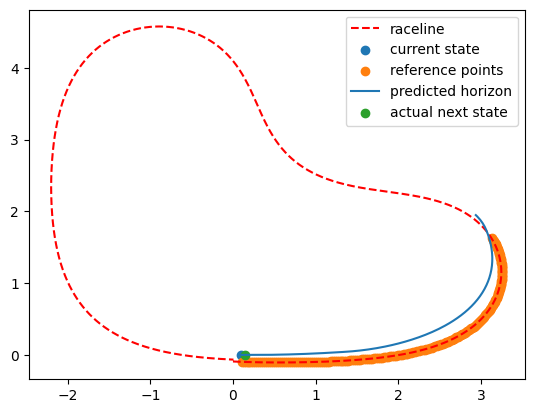

initial state is [0.15 0.   0.   0.5 ]
first reference goal state is [ 0.155      -0.09870664  0.          2.96558458]
end of horizon goal state is [3.11913024 1.6568135  2.09706776 2.60347449]
optimal input is [0.01474366 1.9999971 ]


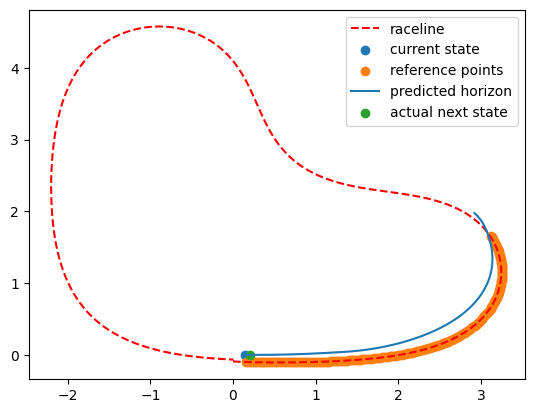

initial state is [2.09995640e-01 4.27215724e-04 2.73842204e-03 6.99953854e-01]
first reference goal state is [ 0.21699518 -0.1007345   0.          2.9707188 ]
end of horizon goal state is [3.09422218 1.69712532 2.14427398 2.60540606]
optimal input is [0.01303271 1.99999574]


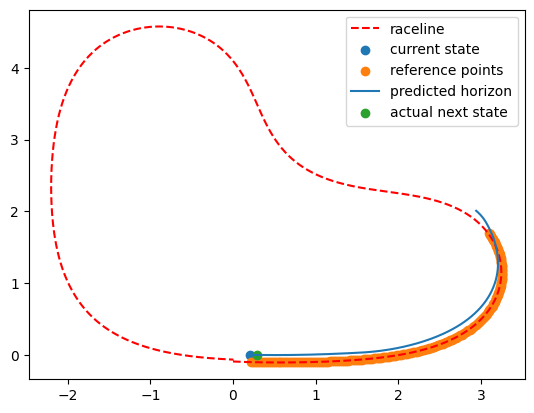

initial state is [0.28998533 0.00137981 0.00717841 0.89992488]
first reference goal state is [ 0.29898457 -0.10284552  0.          2.9769379 ]
end of horizon goal state is [3.05842268 1.74846517 2.20664307 2.60838294]
optimal input is [0.01555142 1.99999338]


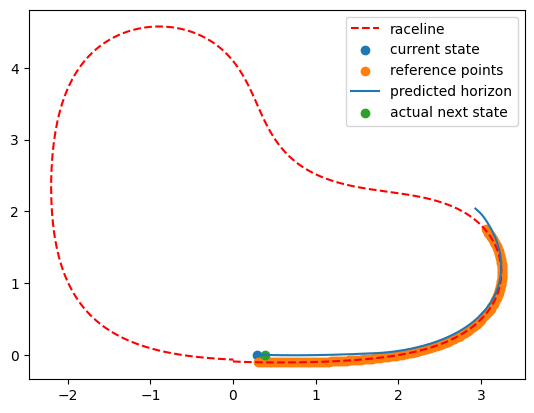

initial state is [0.38996715 0.00295937 0.01215754 1.09991798]
first reference goal state is [ 0.40096633 -0.10462732  0.          2.98363703]
end of horizon goal state is [3.00957147 1.80896768 2.28416317 2.61346664]
optimal input is [0.01879653 1.99998894]


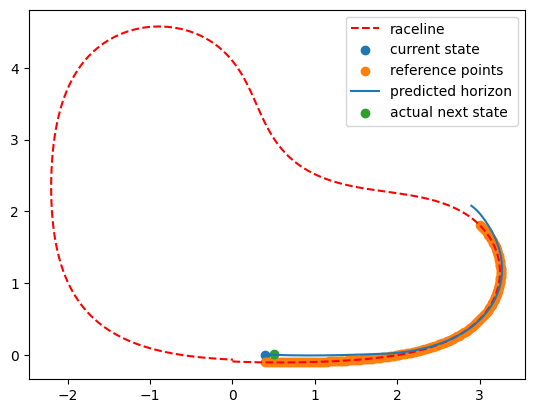

initial state is [0.50992833 0.00565698 0.01914703 1.29987515]
first reference goal state is [ 0.52292708 -0.10563075  0.          2.99001828]
end of horizon goal state is [2.9452453  1.87608036 2.37688172 2.62161871]
optimal input is [0.02279918 1.99997964]


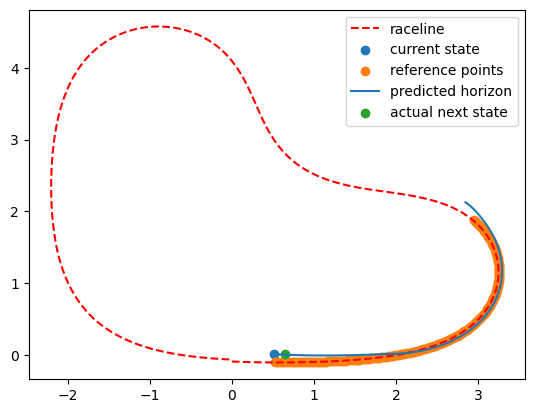

initial state is [0.64984328 0.01012533 0.02896925 1.49979938]
first reference goal state is [ 0.66484127 -0.10535247  0.          2.99532123]
end of horizon goal state is [2.86299407 1.9465451  2.48495607 2.63391262]
optimal input is [0.02792554 1.99995699]


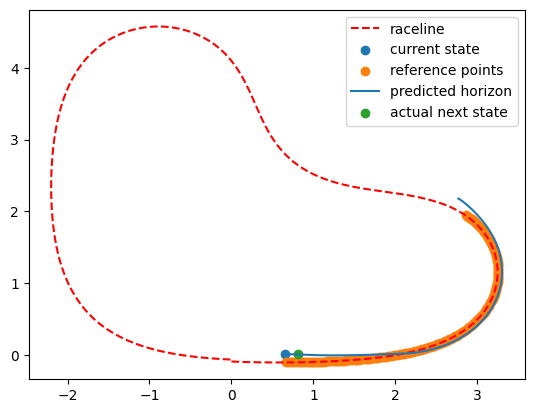

initial state is [0.80965946 0.01728621 0.04254453 1.69966431]
first reference goal state is [ 0.82665611 -0.10320217  0.          2.99875964]
end of horizon goal state is [2.76061364 2.0165924  2.60873073 2.65439304]
optimal input is [0.03400108 1.99988359]


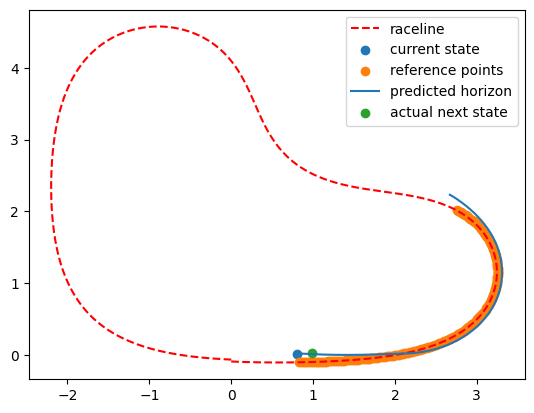

initial state is [0.98926926 0.02847024 0.06118071 1.89941163]
first reference goal state is [ 1.00826337 -0.09840595  0.          2.99982203]
end of horizon goal state is [2.63632622 2.08261648 2.74883907 2.68485116]
optimal input is [0.0405599  1.99916141]


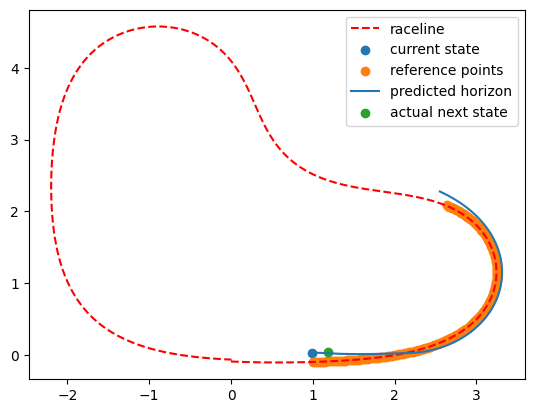

initial state is [1.18846251 0.04552302 0.08633358 2.09894882]
first reference goal state is [ 1.209452   -0.08984176  0.          2.99818165]
end of horizon goal state is [2.48837112 2.1418264  2.90611126 2.72533651]
optimal input is [0.04881311 1.15152999]


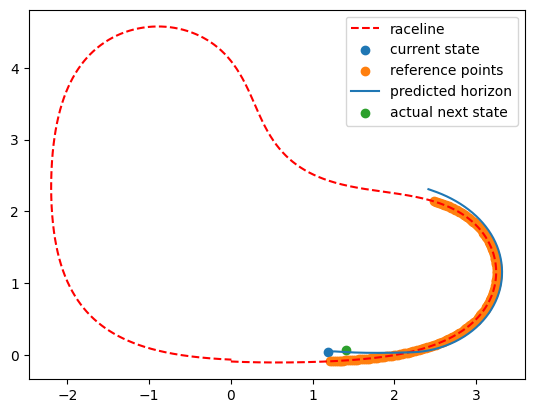

initial state is [1.40685053 0.07087216 0.11932138 2.29808505]
first reference goal state is [ 1.42983138 -0.07576337  0.          2.99318555]
end of horizon goal state is [2.31369336 2.19303247 3.08141005 2.77403748]
optimal input is [0.0560713  0.18815371]


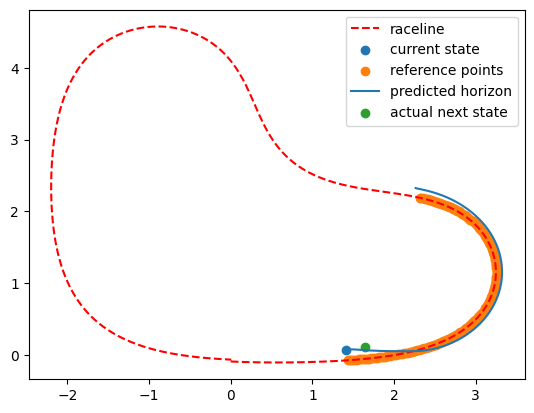

initial state is [1.63954294 0.10709392 0.16188929 2.41188329]
first reference goal state is [ 1.66366177 -0.05386718  0.          2.9834746 ]
end of horizon goal state is [2.10146653 2.2375839  3.14159265 2.82771225]
optimal input is [ 0.04869927 -0.47573694]


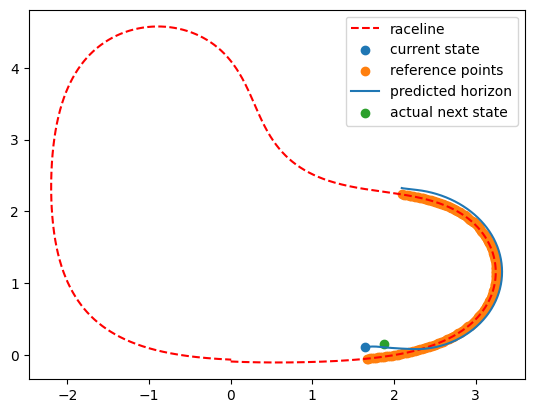

initial state is [1.87663291 0.15573478 0.21274252 2.42884348]
first reference goal state is [ 1.90092135 -0.02156403  0.          2.96754482]
end of horizon goal state is [1.87443415 2.27470572 3.14159265 2.87119701]
optimal input is [-0.14140173 -0.82497359]


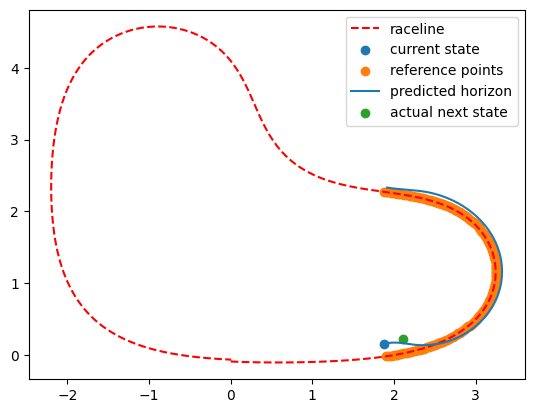

initial state is [2.10963253 0.21522    0.25907937 2.38038077]
first reference goal state is [2.13343634 0.02416821 0.         2.94380561]
end of horizon goal state is [1.64769987 2.31176684 3.14159265 2.8965351 ]
optimal input is [-0.30085498 -1.09289099]


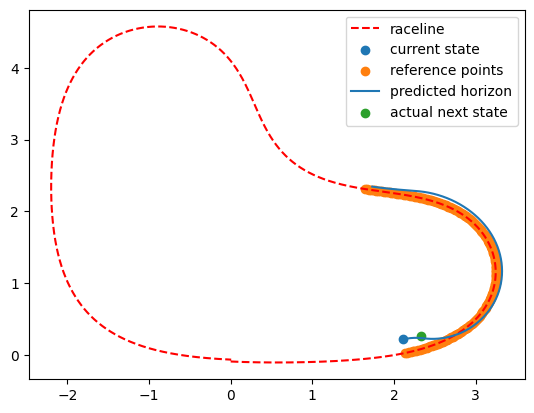

initial state is [2.33712154 0.26075535 0.17319311 2.27115906]
first reference goal state is [2.37442161 0.09311286 0.11598424 2.90829431]
end of horizon goal state is [1.39882073 2.36517745 3.14159265 2.90089213]
optimal input is [ 0.32407463 -1.05019896]


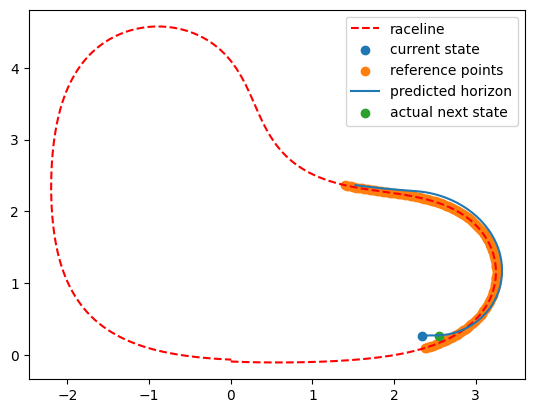

initial state is [ 2.55463871  0.26106571 -0.03805523  2.09430742]
first reference goal state is [2.59971467 0.18659332 0.34646438 2.86398977]
end of horizon goal state is [1.15901917 2.44214611 2.928592   2.88254348]
optimal input is [ 0.39990505 -0.24038839]


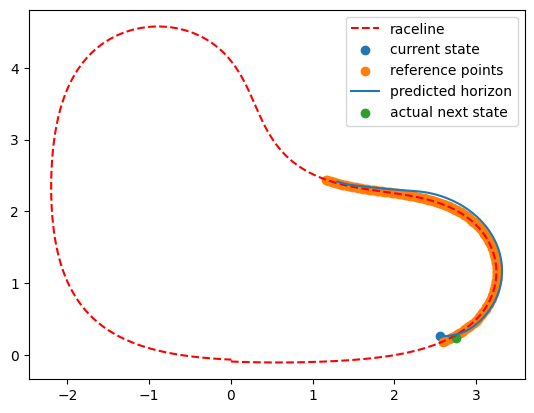

initial state is [ 2.75485777  0.23792774 -0.09331802  1.91283616]
first reference goal state is [2.75388819 0.27448527 0.52014791 2.82494642]
end of horizon goal state is [0.99799144 2.51741801 2.73061601 2.85910906]
optimal input is [0.39999711 1.99068146]


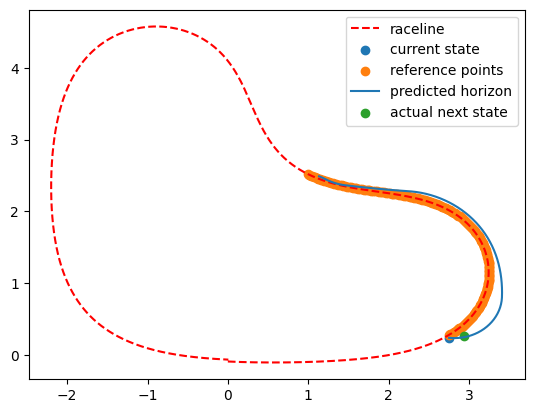

initial state is [2.9381283  0.25834751 0.12447516 1.786153  ]
first reference goal state is [2.87600952 0.36475604 0.67071482 2.78713218]
end of horizon goal state is [0.86958826 2.59744425 2.55810924 2.83473798]
optimal input is [0.39999696 1.99958413]


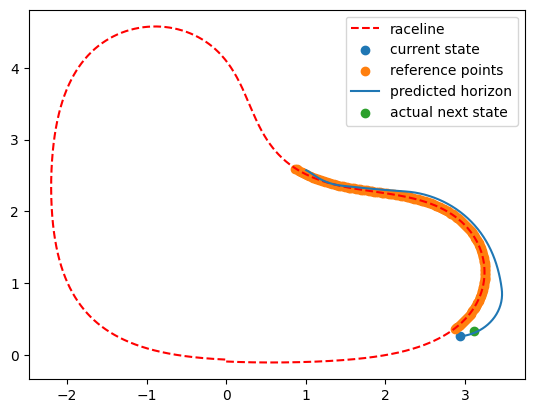

initial state is [3.11002853 0.33394382 0.41187883 1.94276003]
first reference goal state is [2.98880118 0.47281634 0.82637577 2.74533292]
end of horizon goal state is [0.7485299  2.69589329 2.37878249 2.81057615]
optimal input is [0.39999515 1.40756409]


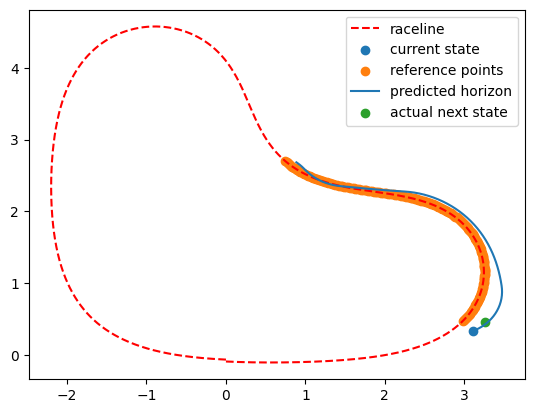

initial state is [3.26501085 0.46512513 0.72123192 2.09353328]
first reference goal state is [3.09114645 0.60498957 0.99323781 2.70254832]
end of horizon goal state is [0.63283428 2.81949061 2.18494161 2.79636608]
optimal input is [0.39998703 0.46760497]


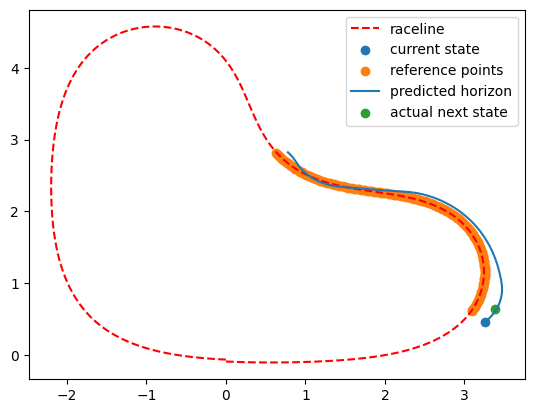

initial state is [3.37955768 0.64615231 1.0469614  2.17417406]
first reference goal state is [3.17397876 0.75913285 1.16791551 2.6651408 ]
end of horizon goal state is [0.5267396  2.96860872 1.97951328 2.79620281]
optimal input is [ 0.39994898 -0.08110743]


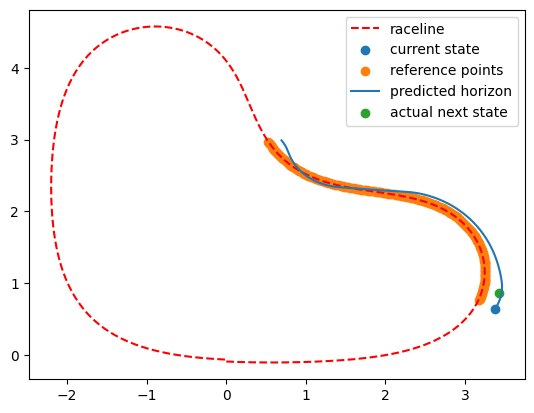

initial state is [3.43212672 0.85657274 1.37851026 2.15386507]
first reference goal state is [3.22919382 0.92675735 1.34399193 2.63598904]
end of horizon goal state is [0.43245781 3.14050976 1.76940285 2.80740514]
optimal input is [ 0.18135841 -0.22880575]


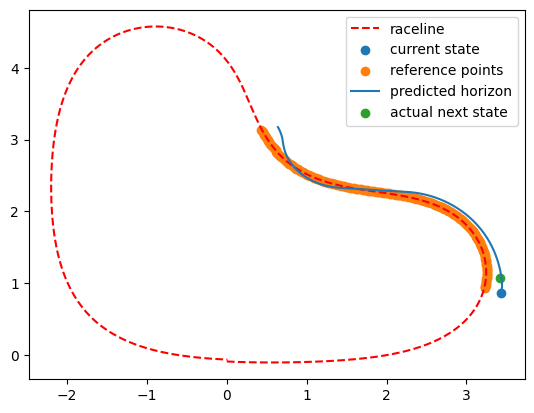

initial state is [3.41418915 1.06785626 1.70548815 2.07974183]
first reference goal state is [3.25380789 1.09769713 1.51620117 2.61631224]
end of horizon goal state is [0.34624598 3.33523034 1.57079633 2.82322838]
optimal input is [ 0.17315464 -0.12951484]


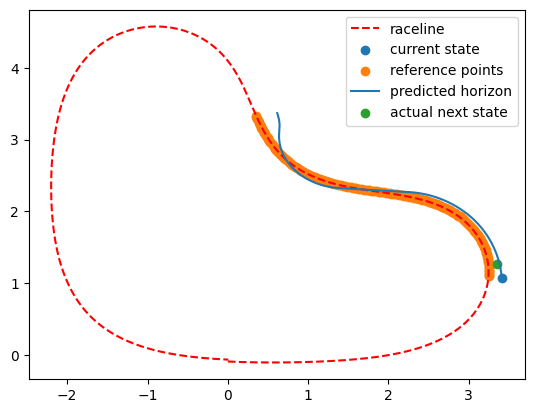

initial state is [3.35248053 1.26757928 1.88329582 2.0748319 ]
first reference goal state is [3.2480223  1.27484717 1.69289844 2.60482877]
end of horizon goal state is [0.26111815 3.55143308 1.63647917 2.83073549]
optimal input is [ 0.20244832 -0.23542471]


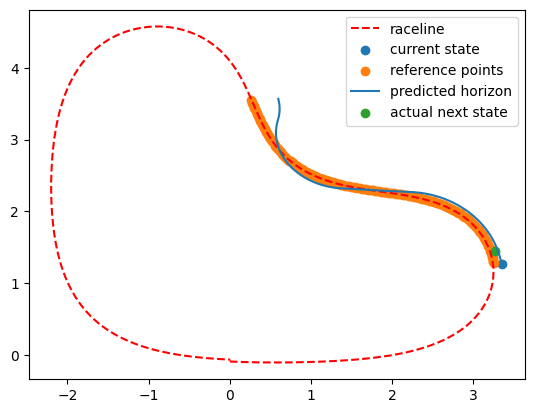

initial state is [3.26437981 1.45453716 2.02260467 2.0544415 ]
first reference goal state is [3.20835743 1.45652279 1.8782885  2.60008731]
end of horizon goal state is [0.17647548 3.75504051 1.82553214 2.82118691]
optimal input is [ 0.2252875  -0.18674003]


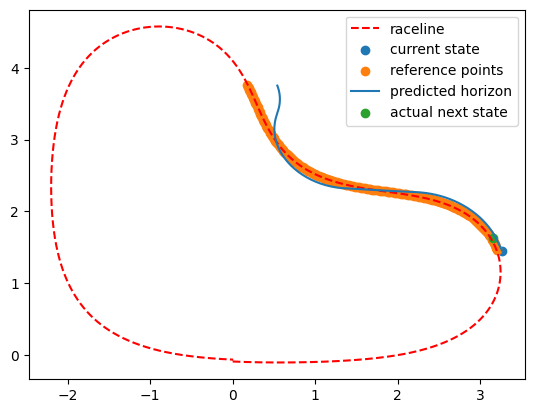

initial state is [3.1503204  1.62315211 2.17794581 2.01558843]
first reference goal state is [3.13233379 1.63355739 2.0704315  2.60267225]
end of horizon goal state is [0.08001016 3.9472771  2.02038853 2.79481701]
optimal input is [0.24020963 0.01761555]


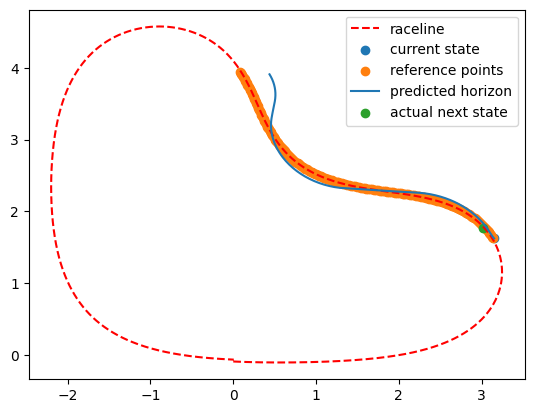

initial state is [3.01146996 1.7670543  2.34920621 1.98032925]
first reference goal state is [3.0203675  1.79640801 2.26765445 2.61219264]
end of horizon goal state is [-0.03752689  4.12517566  2.21755408  2.7521107 ]
optimal input is [0.24769515 0.27618674]


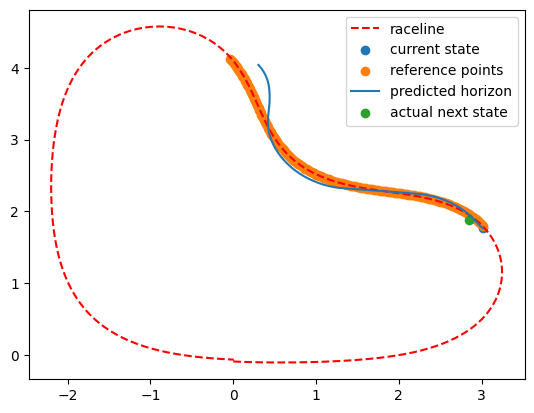

initial state is [2.85064906 1.88182659 2.53079281 1.96537222]
first reference goal state is [2.87439518 1.93762565 2.47051674 2.63213454]
end of horizon goal state is [-0.18232003  4.2819968   2.41574804  2.69903755]
optimal input is [0.25045837 0.5193009 ]


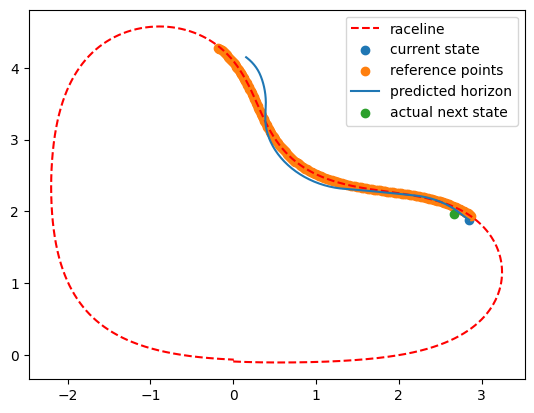

initial state is [2.67126349 1.96440045 2.71868713 1.97650459]
first reference goal state is [2.69740721 2.0523812  2.68109096 2.66929217]
end of horizon goal state is [-0.35564595  4.40971565  2.61547545  2.65019417]
optimal input is [0.25246084 0.73711996]


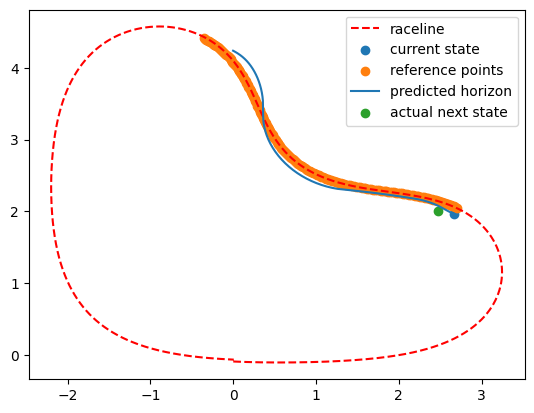

initial state is [2.47717857 2.01198584 2.91118987 2.0116146 ]
first reference goal state is [2.49260662 2.14036227 2.90172538 2.72414292]
end of horizon goal state is [-0.55397723  4.50109649  2.81774124  2.61131806]
optimal input is [0.25086564 1.00773689]


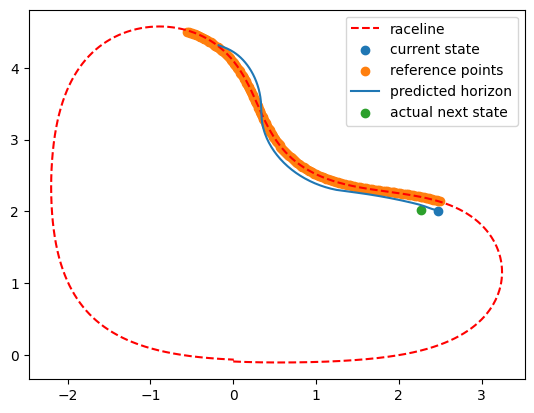

initial state is [2.27305728 2.02139284 3.10930068 2.06680384]
first reference goal state is [2.25884536 2.20607894 3.13414583 2.78880296]
end of horizon goal state is [-0.77082333  4.5501675   3.02351504  2.58486473]
optimal input is [-0.02138114  1.43076834]


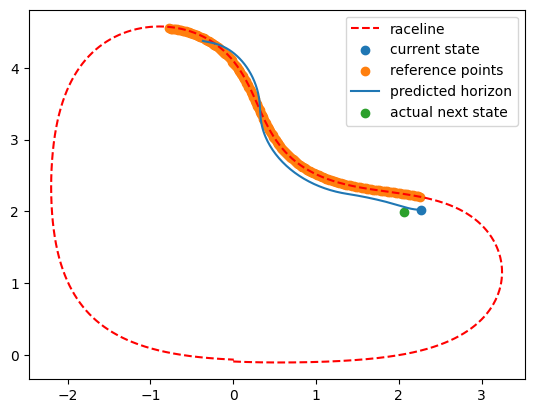

initial state is [2.06437265 1.98946624 3.31265242 2.14751826]
first reference goal state is [2.04289746 2.24774657 3.14159265 2.84051701]
end of horizon goal state is [-0.94560497  4.55623744 -3.09790907  2.57340332]
optimal input is [-0.39995638  1.47869703]


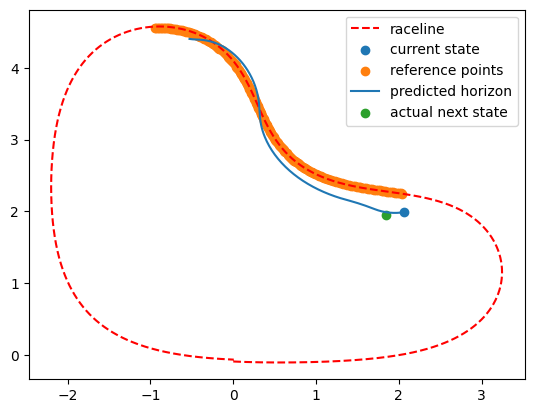

initial state is [1.84728843 1.94290271 3.34350177 2.29083843]
first reference goal state is [1.82438005 2.28252395 3.14159265 2.87838788]
end of horizon goal state is [-1.1170713   4.53407588 -2.93790348  2.56919286]
optimal input is [-0.39997749  1.25945918]


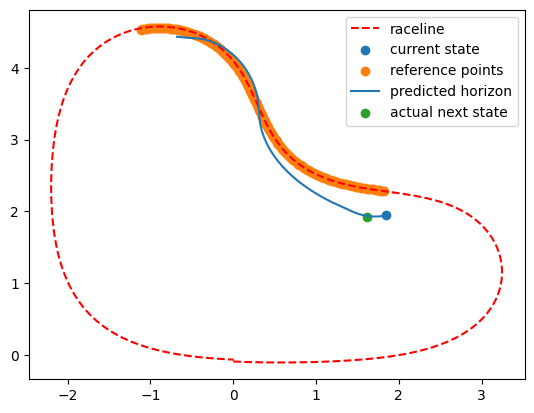

initial state is [1.61843281 1.91954274 3.20699328 2.30874478]
first reference goal state is [1.59534536 2.32143612 3.14159265 2.89953799]
end of horizon goal state is [-1.28848905  4.48238344 -2.77204399  2.57214174]
optimal input is [-0.39993511  1.50586995]


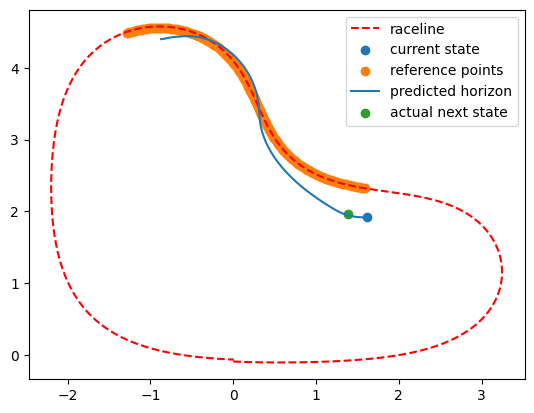

initial state is [1.39023791 1.95975366 2.90578789 2.32974435]
first reference goal state is [1.36694047 2.37374972 3.14159265 2.89972087]
end of horizon goal state is [-1.44816644  4.40360098 -2.60692963  2.58213517]
optimal input is [-0.18580453  1.30404962]


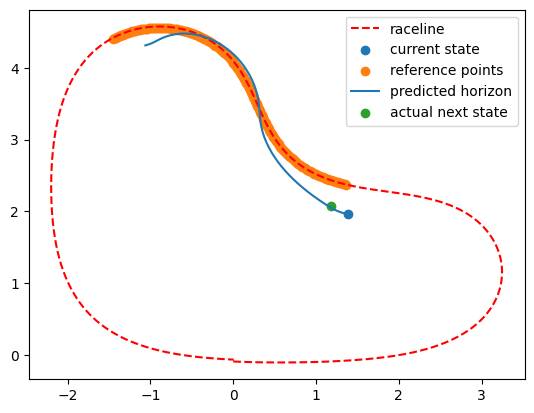

initial state is [1.18336679 2.07292591 2.56129084 2.38632701]
first reference goal state is [1.20846453 2.42336356 2.98591037 2.88804373]
end of horizon goal state is [-1.56175949  4.32549315 -2.47905268  2.59455709]
optimal input is [-0.10202232  0.47408175]


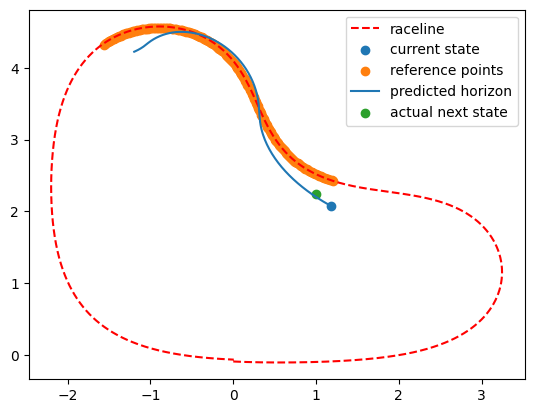

initial state is [1.0026118  2.23976421 2.34751647 2.51699817]
first reference goal state is [1.05852261 2.4863145  2.80716788 2.86892566]
end of horizon goal state is [-1.66975955  4.22937615 -2.34492028  2.61283372]
optimal input is [-0.13990183 -0.62121789]


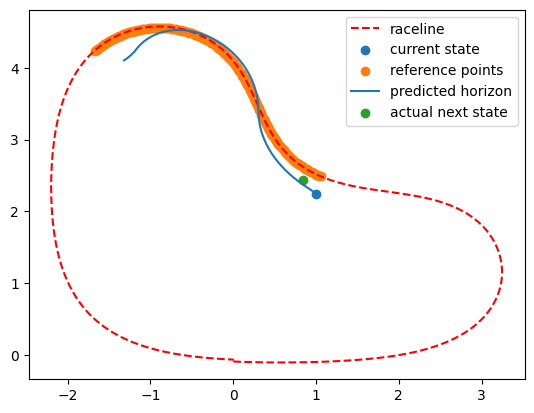

initial state is [0.84118968 2.436191   2.23233068 2.56364977]
first reference goal state is [0.89726801 2.5783451  2.59661859 2.84016577]
end of horizon goal state is [-1.78303841  4.09793972 -2.18416578  2.64306666]
optimal input is [-0.19596411 -1.22878028]


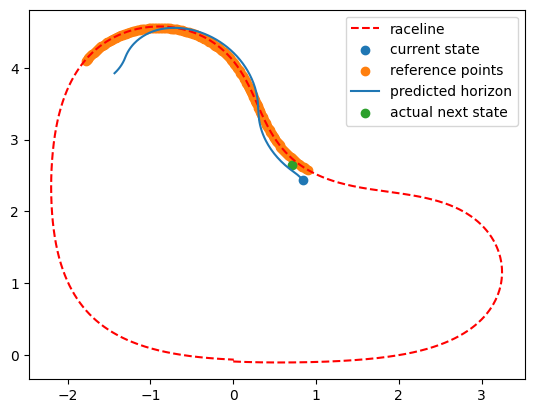

initial state is [0.70583266 2.64907472 2.10382429 2.48565104]
first reference goal state is [0.73411045 2.70951087 2.35600582 2.80804282]
end of horizon goal state is [-1.89379182  3.92568506 -1.99579473  2.6874541 ]
optimal input is [-0.23904258 -1.15556882]


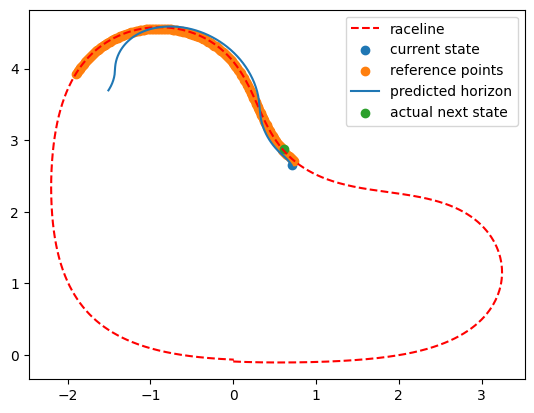

initial state is [0.61148434 2.87047161 1.93288472 2.3343727 ]
first reference goal state is [0.58691279 2.87909501 2.09978973 2.79458843]
end of horizon goal state is [-1.99071289  3.71808542 -1.78961689  2.74336011]
optimal input is [-0.25925436 -0.62571551]


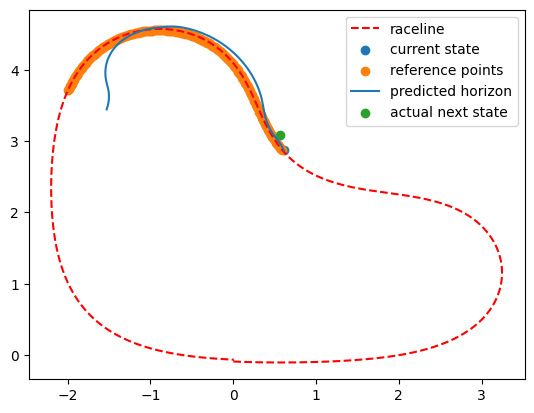

initial state is [0.56684155 3.09180647 1.73146717 2.18631386]
first reference goal state is [0.46242034 3.08127931 1.83896265 2.80270437]
end of horizon goal state is [-2.06909102  3.48001112 -1.57493861  2.80489604]
optimal input is [-0.26601261  0.1910603 ]


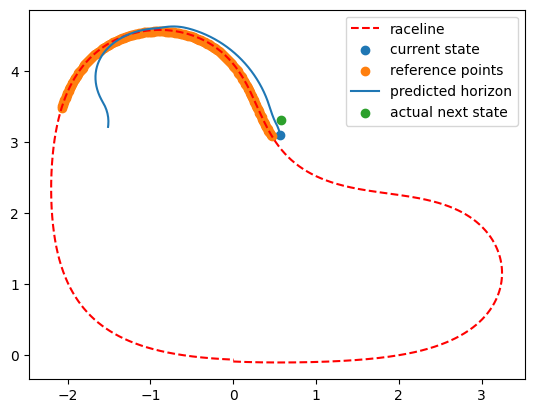

initial state is [0.57167077 3.30589965 1.51913098 2.09569798]
first reference goal state is [0.35209172 3.32097847 1.57517886 2.82222236]
end of horizon goal state is [-2.12987217  3.20886232 -1.57079633  2.86513724]
optimal input is [0.39988619 1.29152789]


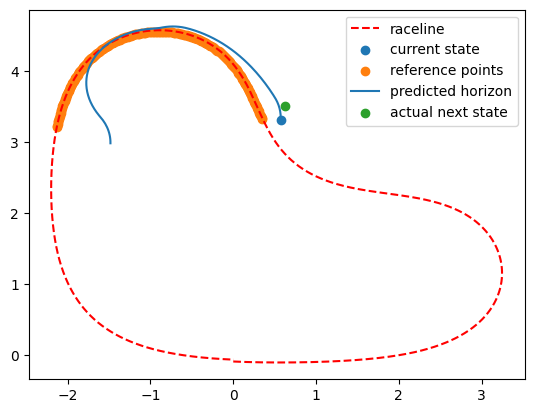

initial state is [0.62223883 3.50929085 1.30463255 2.09029167]
first reference goal state is [0.27290082 3.52139812 1.61025283 2.83068759]
end of horizon goal state is [-2.16096852  3.00216757 -1.57079633  2.90182735]
optimal input is [0.3999962  1.99963501]


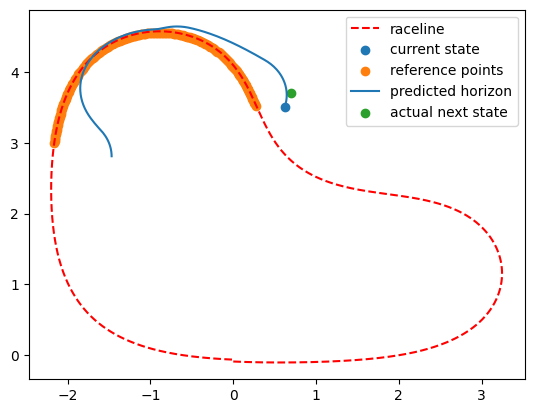

initial state is [0.69222353 3.70979129 1.24997255 2.13578293]
first reference goal state is [0.21752631 3.65964841 1.73463891 2.82773427]
end of horizon goal state is [-2.17776049  2.84499216 -1.57079633  2.92415393]
optimal input is [0.39999843 1.99989231]


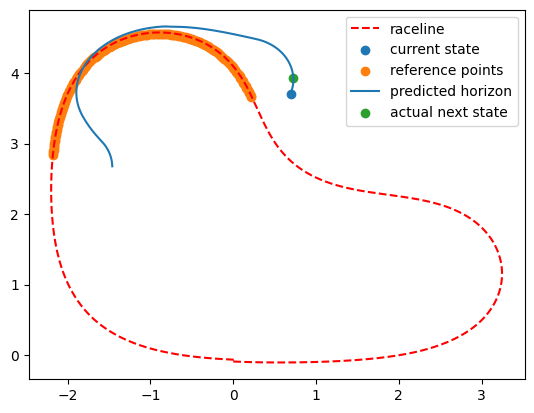

initial state is [0.72502266 3.92416969 1.45530874 2.20657939]
first reference goal state is [0.16109032 3.78878637 1.85860267 2.81779959]
end of horizon goal state is [-2.18961371  2.68691843 -1.57079633  2.94196444]
optimal input is [0.39999246 1.999435  ]


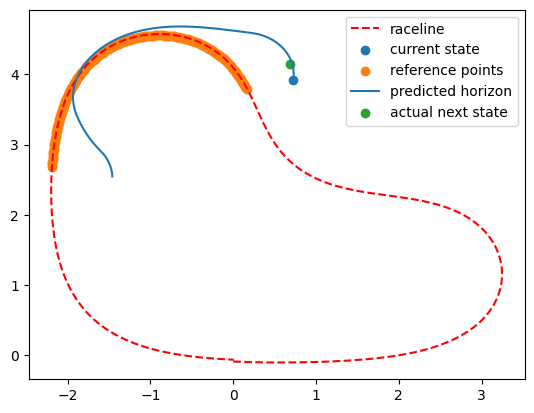

initial state is [0.68987249 4.14824754 1.78236282 2.32352751]
first reference goal state is [0.09582922 3.91886212 1.99056393 2.79997346]
end of horizon goal state is [-2.19735424  2.5169027  -1.57079633  2.95613868]
optimal input is [0.39998486 1.99691322]


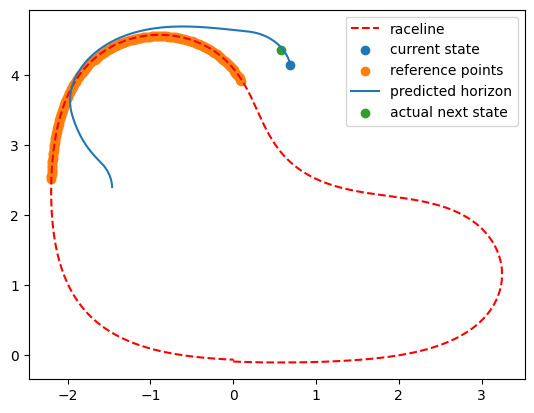

initial state is [0.57981292 4.35912177 2.13255956 2.43135964]
first reference goal state is [0.0179293  4.04803352 2.12954675 2.7731786 ]
end of horizon goal state is [-2.20029853  2.33568731 -1.57079633  2.96580345]
optimal input is [0.39995709 1.15139874]


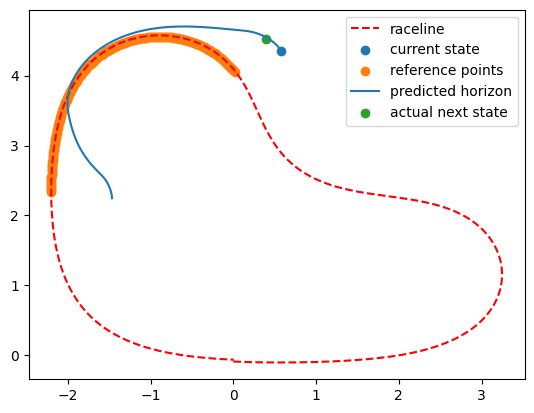

initial state is [0.39978471 4.52857974 2.48843256 2.51966931]
first reference goal state is [-0.07520889  4.17161665  2.27301448  2.73778947]
end of horizon goal state is [-2.19762416  2.14606616 -1.57079633  2.97017542]
optimal input is [0.39959467 0.13432227]


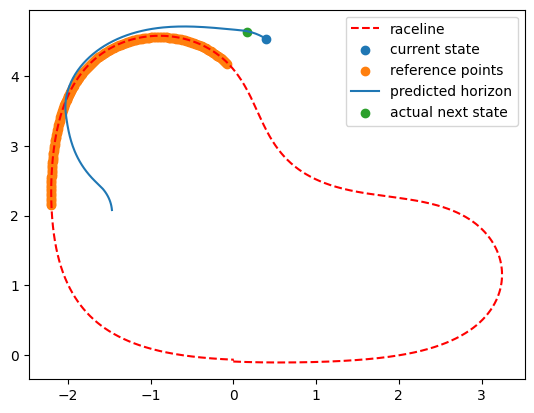

initial state is [0.17079528 4.63081033 2.83920858 2.5089245 ]
first reference goal state is [-0.18210715  4.28180412  2.41548187  2.69911134]
end of horizon goal state is [-2.18867936  1.95505886 -1.57079633  2.968796  ]
optimal input is [ 0.01134042 -0.6169265 ]


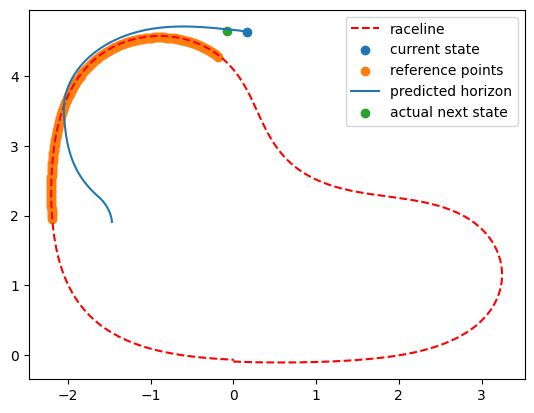

initial state is [-0.07257104  4.65112171  3.17525011  2.39254717]
first reference goal state is [-0.29500922  4.37096631  2.54885847  2.66548866]
end of horizon goal state is [-2.17372434  1.77402782 -1.57079633  2.96211241]
optimal input is [ 0.05357228 -0.76998279]


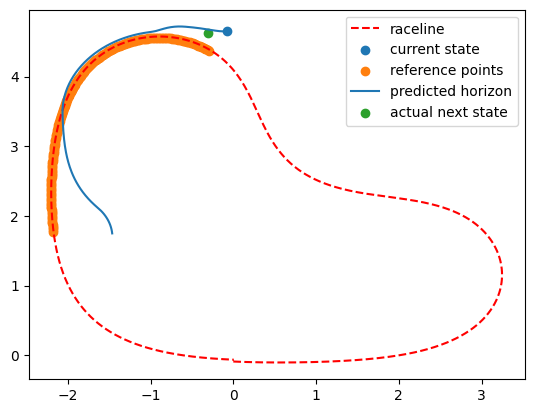

initial state is [-0.30799295  4.62740845  3.25900388  2.33537128]
first reference goal state is [-0.42365862  4.44674559  2.68712439  2.63501951]
end of horizon goal state is [-2.15010789  1.58465389 -1.57079633  2.94938528]
optimal input is [-0.05722989 -1.121984  ]


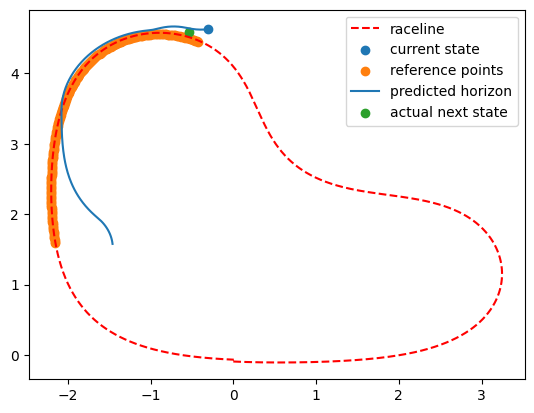

initial state is [-0.53490265  4.59322668  3.30020049  2.25538543]
first reference goal state is [-0.58271532  4.51042902  2.84566116  2.606715  ]
end of horizon goal state is [-2.11024157  1.36629501 -1.57079633  2.92704815]
optimal input is [ 0.05382372 -1.23105467]


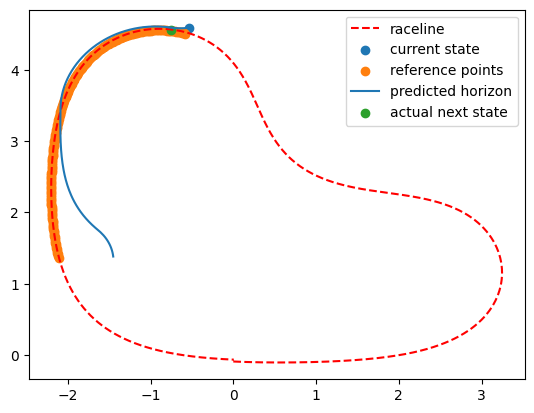

initial state is [-0.75239844  4.56355896  3.26863109  2.13783631]
first reference goal state is [-0.7731687   4.55043837  3.02569599  2.58468053]
end of horizon goal state is [-2.04536448  1.12482985 -1.48692009  2.8928746 ]
optimal input is [ 0.29703719 -0.90642931]


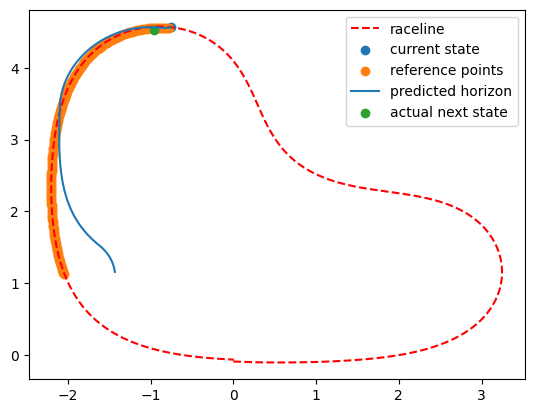

initial state is [-0.95738216  4.53298487  3.2964624   2.00999353]
first reference goal state is [-0.97630765  4.55433685 -3.06947926  2.5719027 ]
end of horizon goal state is [-1.9585802   0.90089145 -1.27591233  2.85441858]
optimal input is [ 0.24521036 -0.32797406]


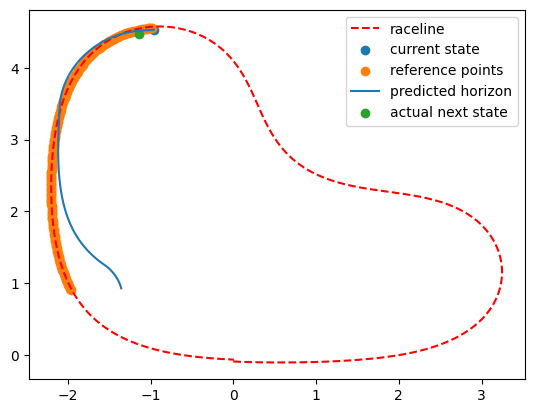

initial state is [-1.1408491   4.47627364  3.46094083  1.84924577]
first reference goal state is [-1.1686185   4.52178317 -2.88888233  2.56957041]
end of horizon goal state is [-1.85476074  0.70779479 -1.07529479  2.81708746]
optimal input is [0.24550025 0.39455516]


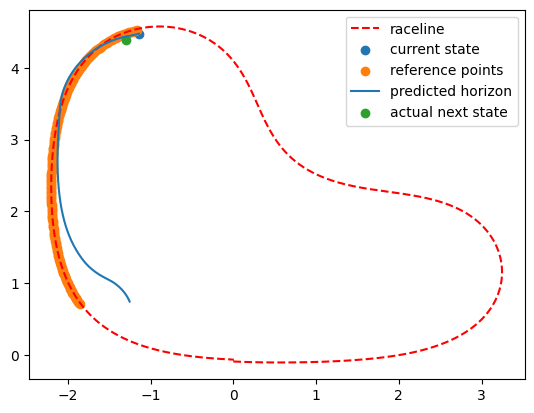

initial state is [-1.30200952  4.38739203  3.6415609   1.81439955]
first reference goal state is [-1.34978864  4.45595176 -2.71022001  2.57491395]
end of horizon goal state is [-1.73093684  0.53785284 -0.87946658  2.78251316]
optimal input is [0.24393983 0.64812789]


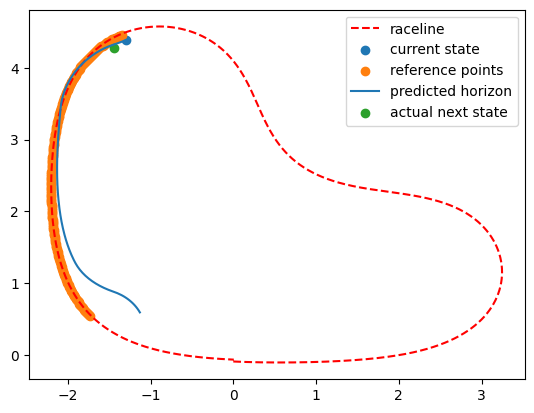

initial state is [-1.44481106  4.27234137  3.81542874  1.84258567]
first reference goal state is [-1.5214919   4.35558363 -2.52566352  2.58946656]
end of horizon goal state is [-1.581068    0.38611462 -0.68023556  2.7552666 ]
optimal input is [0.23893132 0.70798822]


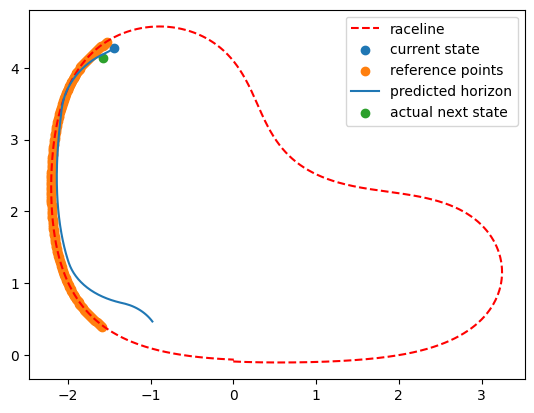

initial state is [-1.56827388  4.13130195  3.99171878  1.89557243]
first reference goal state is [-1.68075217  4.21815635 -2.33036209  2.6153493 ]
end of horizon goal state is [-1.40059968  0.25280761 -0.47252259  2.74362237]
optimal input is [0.23348686 0.73279353]


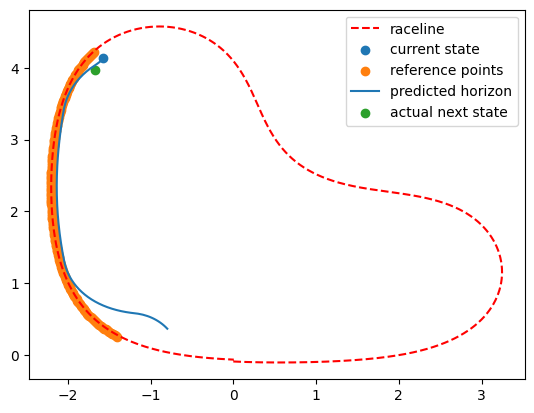

initial state is [-1.66840306  3.9662972   4.16970277  1.95435634]
first reference goal state is [-1.82175286  4.04363669 -2.12262528  2.65666171]
end of horizon goal state is [-1.1871562   0.13990191 -0.25459573  2.75052951]
optimal input is [0.2281785  0.80140239]


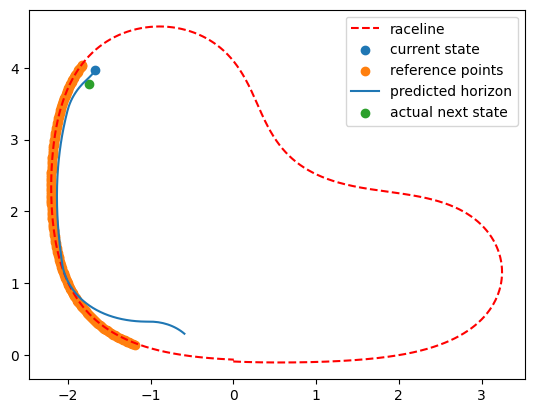

initial state is [-1.74051634  3.78091261  4.34889685  2.01482324]
first reference goal state is [-1.94048783  3.83427397 -1.90264089  2.71218664]
end of horizon goal state is [-0.93717458  0.04850878 -0.02667553  2.77653114]
optimal input is [0.23816887 0.97094789]


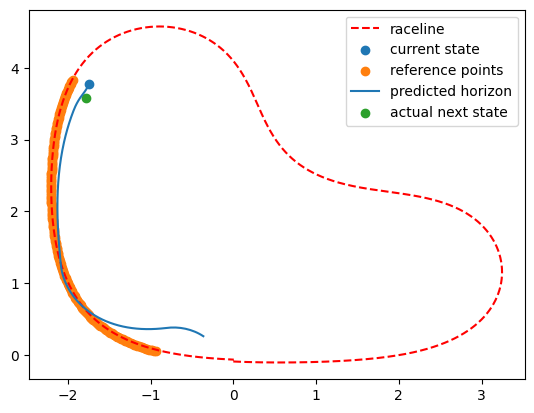

initial state is [-1.78035039  3.57962302  4.52937479  2.08108457]
first reference goal state is [-2.03632608  3.5904218  -1.67173306  2.77710946]
end of horizon goal state is [-0.64928953 -0.02031335  0.          2.82015207]
optimal input is [0.06370075 1.3536856 ]


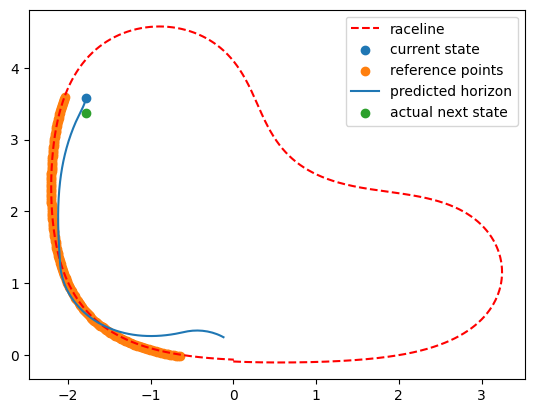

initial state is [-1.78246847  3.36741452  4.72170031  2.15789669]
first reference goal state is [-2.10241502  3.34583556 -1.57079633  2.83638212]
end of horizon goal state is [-0.39266806 -0.05907573  0.          2.8668842 ]
optimal input is [-0.39947807  1.54804305]


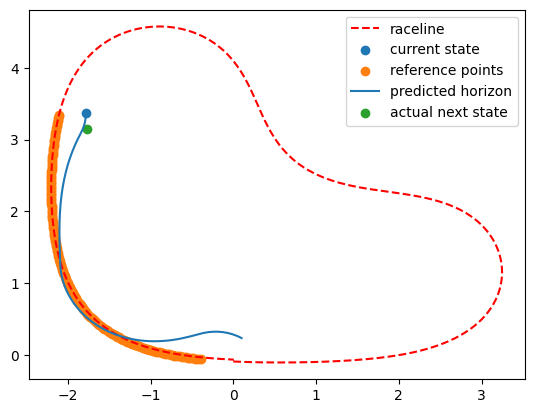

initial state is [-1.76337664  3.14480519  4.8013321   2.30166028]
first reference goal state is [-2.14435105  3.12178859 -1.57079633  2.88158861]
end of horizon goal state is [-0.16627808 -0.08106735  0.          2.91349387]
optimal input is [-0.39993235  1.04392232]


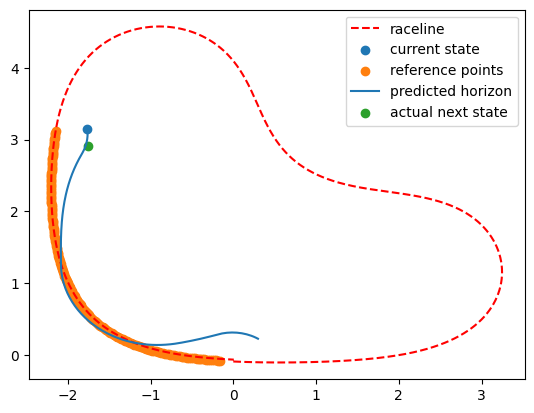

initial state is [-1.75379798  2.91286428  4.72512217  2.33484035]
first reference goal state is [-2.17354013  2.88951587 -1.57079633  2.91831623]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [-0.39978161  0.88869828]


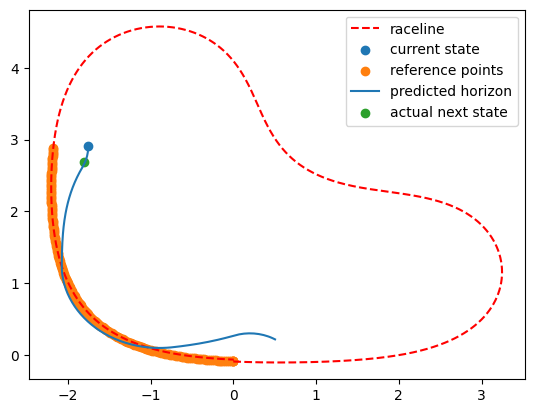

initial state is [-1.80050596  2.68499982  4.45220346  2.32360747]
first reference goal state is [-2.19107581  2.66176374 -1.57079633  2.9444036 ]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [0.11619999 0.64639115]


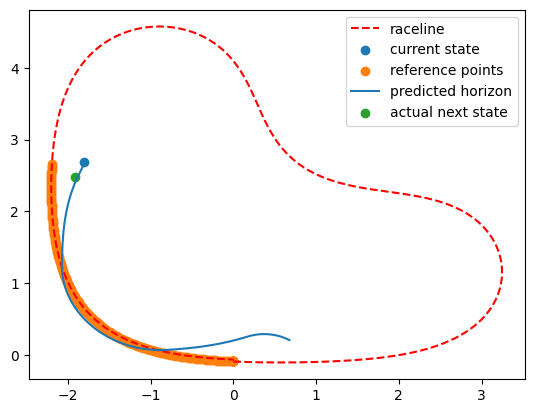

initial state is [-1.91642474  2.48380132  4.11473109  2.3207894 ]
first reference goal state is [-2.1988444   2.46059343 -1.57079633  2.9597631 ]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [0.33148857 0.40440235]


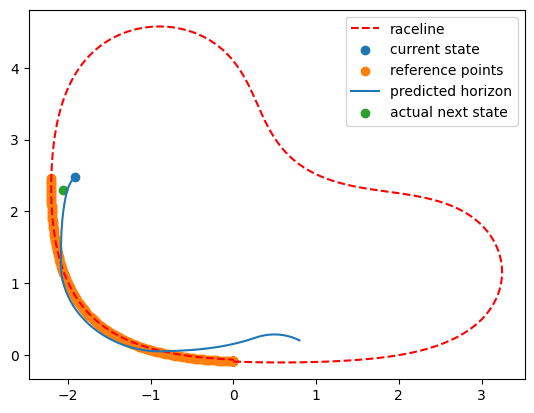

initial state is [-2.06043403  2.29892456  4.06367127  2.36309223]
first reference goal state is [-2.20009278  2.27529364 -1.57079633  2.96785122]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [0.39997255 0.20455299]


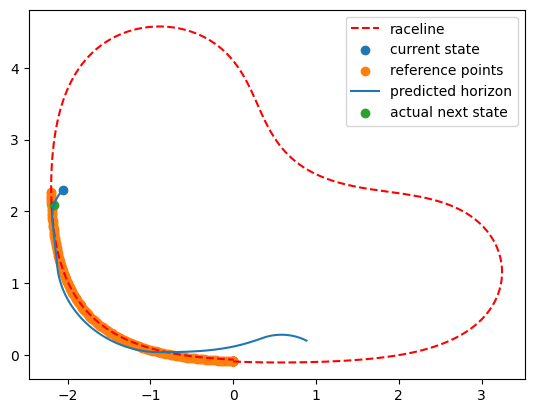

initial state is [-2.16927338  2.0932045   4.27615788  2.30581242]
first reference goal state is [-2.19485208  2.07014637 -1.57079633  2.97029755]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [0.39973769 0.32849368]


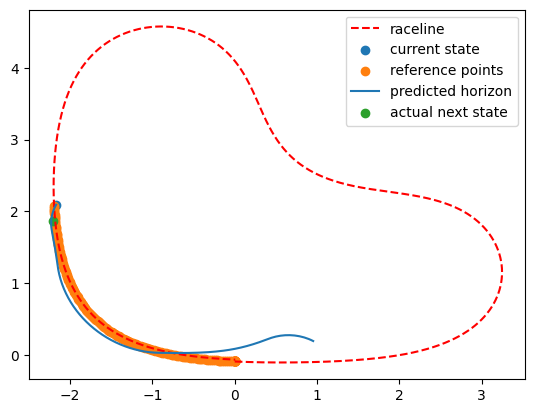

initial state is [-2.21138411  1.87055097  4.58994358  2.23028904]
first reference goal state is [-2.18067979  1.84824808 -1.57079633  2.96548366]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [0.00483027 0.48444015]


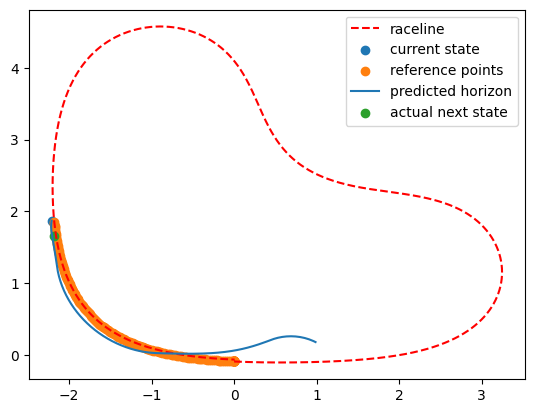

initial state is [-2.17900897  1.65218793  4.92364262  2.18308717]
first reference goal state is [-2.15664412  1.63035705 -1.57079633  2.95295959]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [-0.01345822  0.51471217]


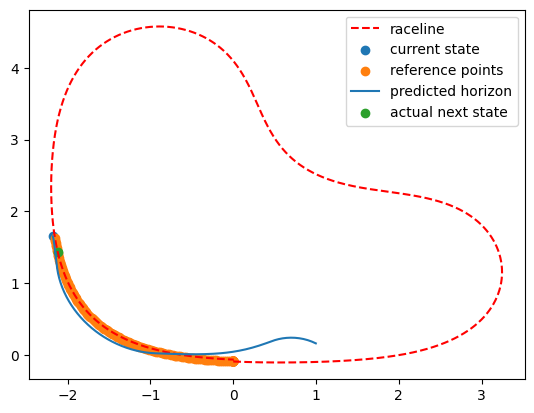

initial state is [-2.11344471  1.4402495   5.00936395  2.24259557]
first reference goal state is [-2.12106109  1.41782354 -1.57079633  2.93314007]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [0.15171958 0.0490387 ]


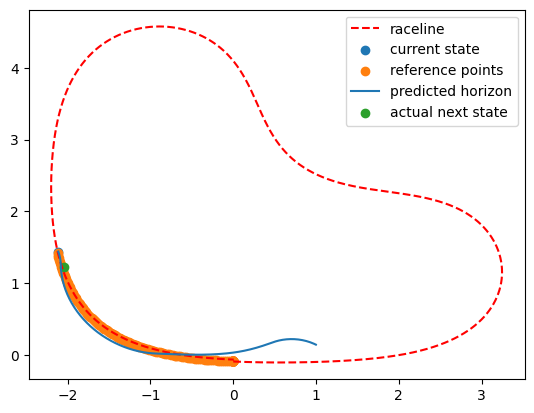

initial state is [-2.04863191  1.2228913   5.00045916  2.29383132]
first reference goal state is [-2.06855913  1.20093619 -1.55385871  2.9045604 ]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [ 0.22404947 -0.44165434]


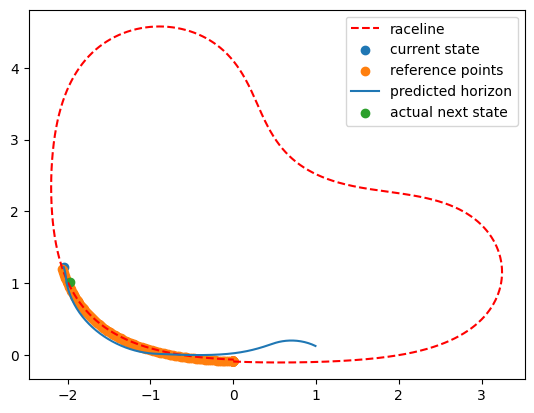

initial state is [-1.96738023  1.01015299  5.100837    2.27177842]
first reference goal state is [-1.99424707  0.98369798 -1.35643888  2.86934112]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [ 0.23490814 -0.55065487]


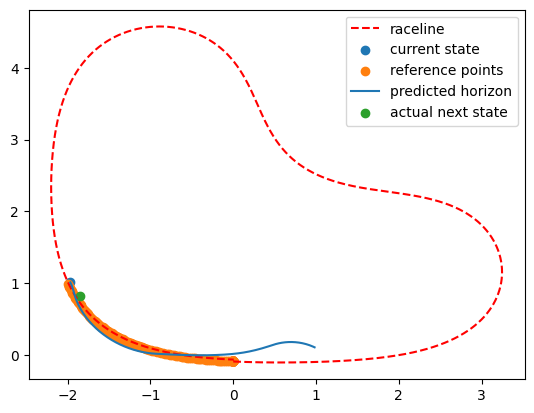

initial state is [-1.85322712  0.81847379  5.28024561  2.1961276 ]
first reference goal state is [-1.8967358   0.77880255 -1.15134363  2.83126286]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [ 0.23703362 -0.40889319]


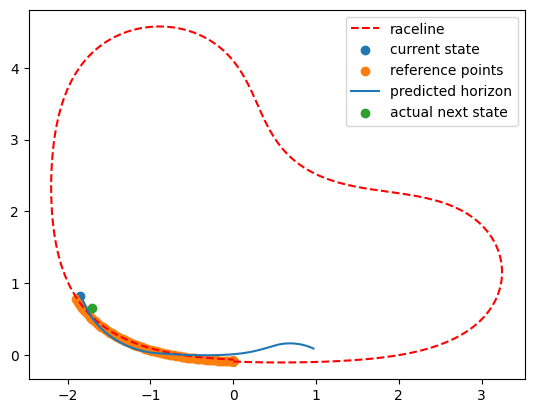

initial state is [-1.70822814  0.65851247  5.47512897  2.11964003]
first reference goal state is [-1.77319369  0.59026554 -0.9422964   2.79315077]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [0.30978148 0.40118599]


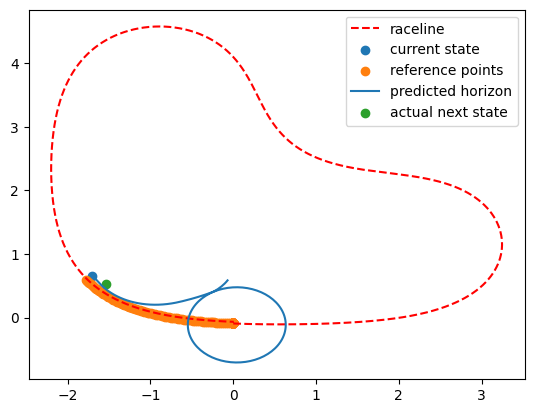

initial state is [-1.53990624  0.53418267  5.66719221  2.06082197]
first reference goal state is [-1.61980703  0.42099975 -0.72881916  2.76053801]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [0.30691095 1.05643004]


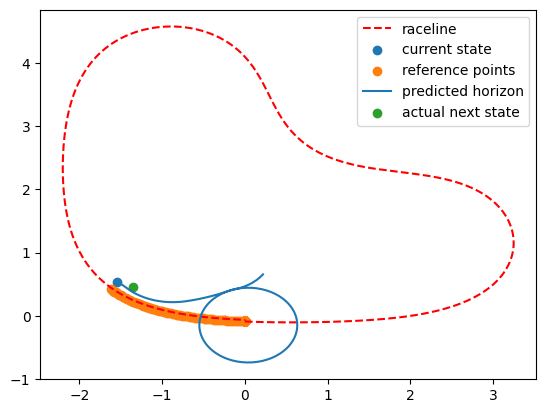

initial state is [-1.35096095  0.45284565  5.89999403  2.05475326]
first reference goal state is [-1.43350818  0.27406257 -0.50849919  2.74426738]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [0.30374526 1.24526236]


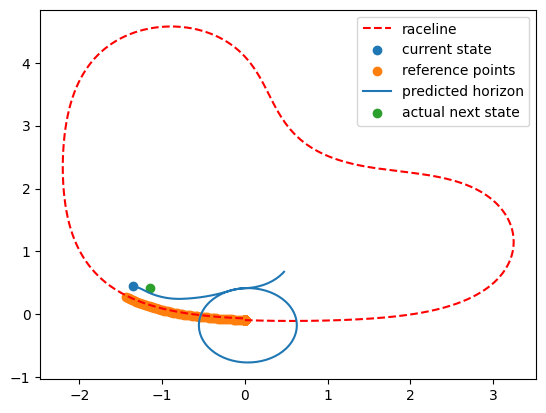

initial state is [-1.14384285  0.41954472  6.14763556  2.1295077 ]
first reference goal state is [-1.20434109  0.14761942 -0.27127489  2.74922889]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [0.28725181 0.80606383]


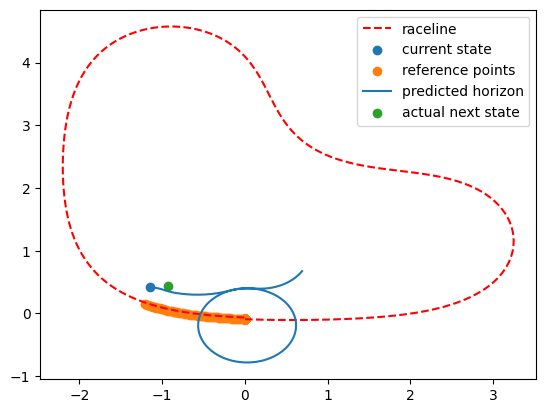

initial state is [-0.9267131   0.43824275  6.40149263  2.21960874]
first reference goal state is [-0.91580059  0.04225695 -0.00840531  2.77929864]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [-0.39921248  0.49647491]


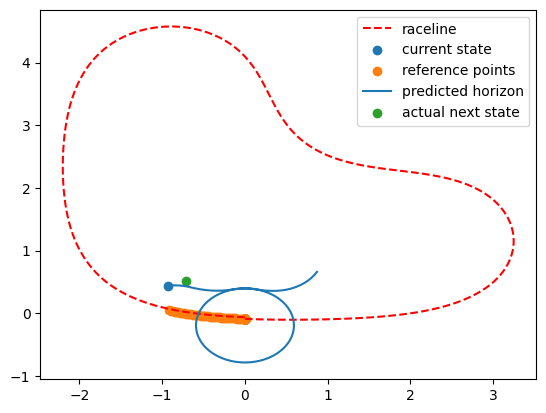

initial state is [-0.71399152  0.51096271  6.65218487  2.26847925]
first reference goal state is [-0.69130672 -0.01217559  0.          2.8131719 ]
end of horizon goal state is [-5.62281797e-18 -9.18275861e-02  0.00000000e+00  2.95114956e+00]
optimal input is [-0.3999885   0.20857318]


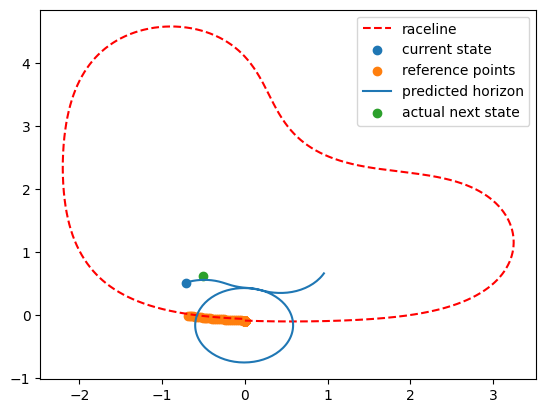

2025-05-12 21:37:01.540 | INFO     | __main__:<module>:78 - Average lap time: nan s. Std: nan s.
2025-05-12 21:37:01.541 | INFO     | __main__:<module>:79 - Rollout truncated.


Saved log to mpc_log_20250512-213701.csv


In [12]:
import pandas as pd
import time
# Create an instance of the simulator.
# path_follower = PIDRacelineFollower(dt=dt, steer_pid_params=pid_steer_params_raceline_follower, speed_pid_params=pid_speed_params_raceline_follower)
raceline = Raceline()
seed = 42

env = gym.make('barc-v0',
               track_name='L_track_barc',
               do_render=True,
               max_n_laps=5,  # Feel free to modify this.
               in_colab=True,
               )
# env.unwrapped.bind_controller(path_follower)

# Reset the car to the starting line, with an initial velocity of 0.5 m/s.
_, info = env.reset(seed=seed, options={'spawning': 'fixed'})

truncated = False # Flag indicating whether the car is at a terminal state.

lap_time = []  # Keep track of the lap times.

model = BicycleModel(L=0.25,dt=0.01)
controller = MPCController(model)


steer_MPC = []
steer_cmd_Msg = []
steer_actual_Msg = []
t_Msg = []
pose_error_Msg = []



while not truncated:
# for i in range(1000):

    # extract states -------------------------------------------
    initial_state = extract_initial_state(info['vehicle_state'])
    goal_state = raceline.get_MPC_reference(info['vehicle_state'].p.s, controller, initial_state[3])
    print('initial state is',initial_state)
    print('first reference goal state is',goal_state[:,0])
    print('end of horizon goal state is',goal_state[:,-1])

    # MPC -------------------------------------------
    u,x = controller.solve(initial_state, goal_state)
    print("optimal input is",u)
    action = np.array([u[1], u[0]]) # sim takes [acceleration, steering]

    steer_MPC.append(u[0])
    t_Msg.append(info['vehicle_state'].t)

    ax = plt.gca()
    raceline.plot_raceline(ax)
    plt.scatter (initial_state[0],initial_state[1],label="current state")
    plt.scatter (goal_state[0,:],goal_state[1,:],label="reference points")
    plt.plot(x[0,:],x[1,:],label="predicted horizon")

    # SIM -------------------------------------------
    _, _, terminated, truncated, info = env.step(action) # Apply the action on the car and get the updated state.

    # extract steer data
    steer_cmd_Msg.append(info['vehicle_state'].u.u_steer)
    steer_actual_Msg.append(info['vehicle_state'].hw.steering)
    pose_error_Msg.append([info['vehicle_state'].p.x_tran,info['vehicle_state'].p.e_psi])


    # extract and plot propagated state
    end_state = extract_initial_state(info['vehicle_state'])
    plt.scatter (end_state[0],end_state[1],label="actual next state")
    plt.legend()
    plt.show()


    if terminated:
        lap_time.append(info['lap_time'])  # Keep track of the time it took to finish a lap.

logger.info(f"Average lap time: {np.mean(lap_time):.1f} s. Std: {np.std(lap_time):.1f} s.")
logger.info("Rollout truncated.")

# Convert pose error log to a DataFrame
pose_error_df = pd.DataFrame({
    "time": t_Msg,
    "x_tran": [p[0] for p in pose_error_Msg],
    "e_psi": [p[1] for p in pose_error_Msg],
})

timestamp = time.strftime("%Y%m%d-%H%M%S")
filename = f"mpc_log_{timestamp}.csv"
filenames.append(filename)

pose_error_df.to_csv(filename, index=False)
print(f"Saved log to {filename}")

##Create Plots

['mpc_log_20250512-213701.csv']


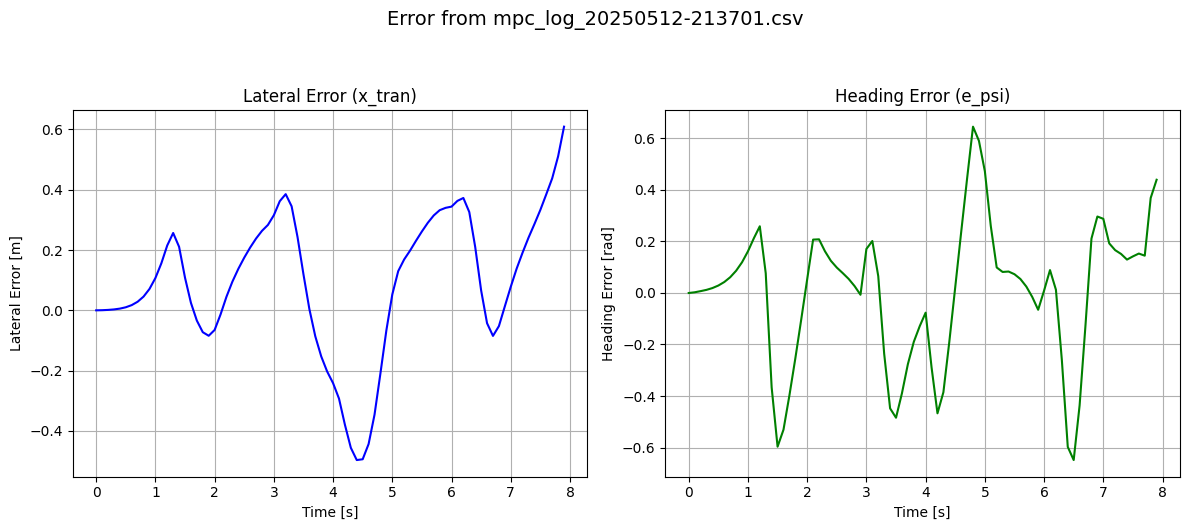

In [13]:
print(filenames)
df = pd.read_csv(filenames[0])
df.head()
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Add a suptitle (super title for the whole figure)
fig.suptitle(f"Error from {filename}", fontsize=14, y=1.05)

# Plot lateral error
axes[0].plot(df["time"], df["x_tran"], color="blue")
axes[0].set_title("Lateral Error (x_tran)")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Lateral Error [m]")
axes[0].grid(True)

# Plot heading error
axes[1].plot(df["time"], df["e_psi"], color="green")
axes[1].set_title("Heading Error (e_psi)")
axes[1].set_xlabel("Time [s]")
axes[1].set_ylabel("Heading Error [rad]")
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Make room for the suptitle
plt.show()


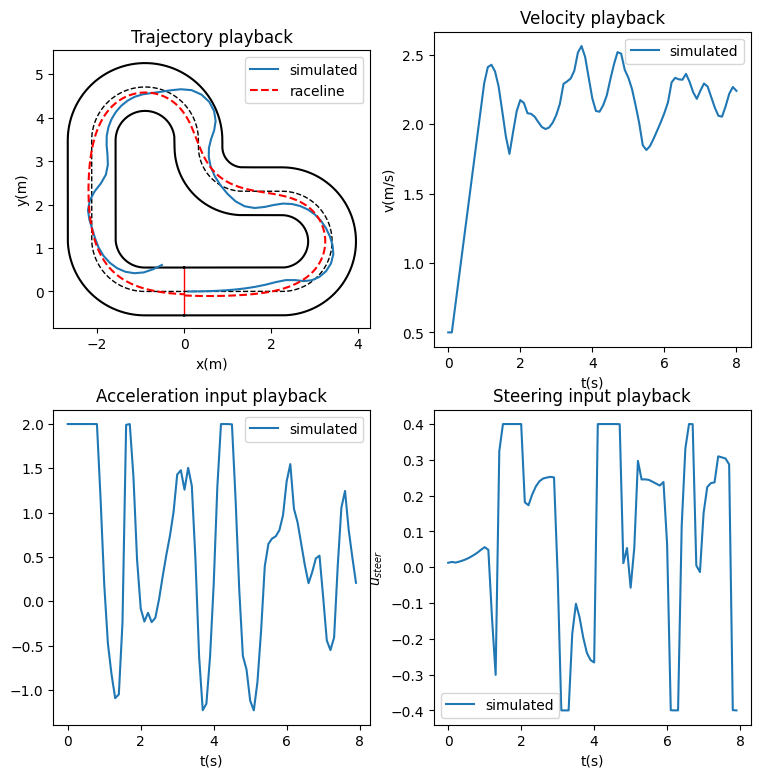

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
env.unwrapped.show_debug_plot(axes)
raceline.plot_raceline(ax=axes[0][0])
for ax in axes.flatten():
    ax.legend()
plt.show()

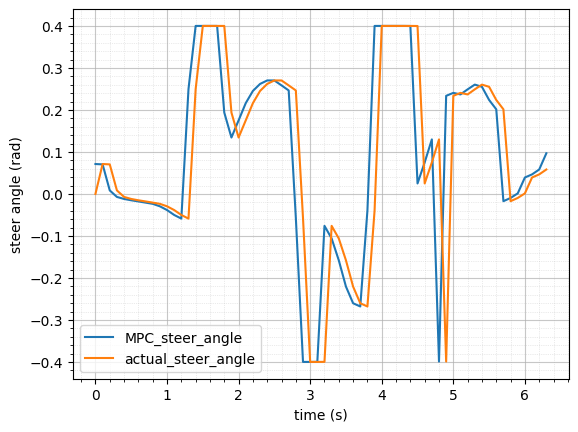

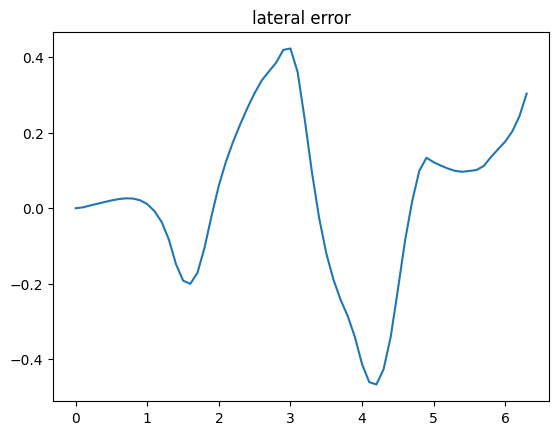

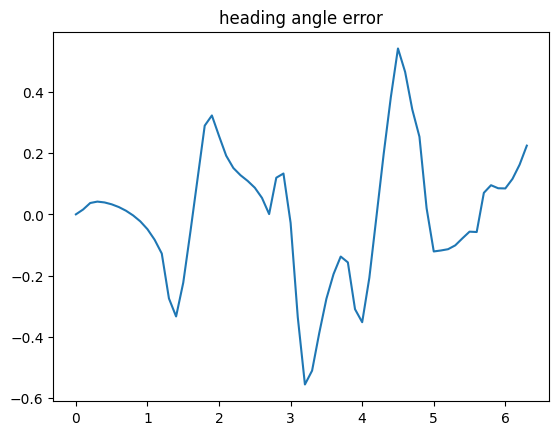

In [12]:
plt.plot(t_Msg,steer_MPC,label="MPC_steer_angle")
plt.plot(t_Msg,steer_cmd_Msg,label="actual_steer_angle")
# plt.plot(steer_actual_Msg,label="actual_steer_Msg")

plt.legend()
plt.xlabel('time (s)')
plt.ylabel('steer angle (rad)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=0.8, alpha=0.7)
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
plt.show()


plt.plot(t_Msg,np.array(pose_error_Msg)[:,0])
plt.title('lateral error')
plt.show()

plt.plot(t_Msg,np.array(pose_error_Msg)[:,1])
plt.title('heading angle error')
plt.show()


AttributeError: 'NoneType' object has no attribute 'get_prediction'

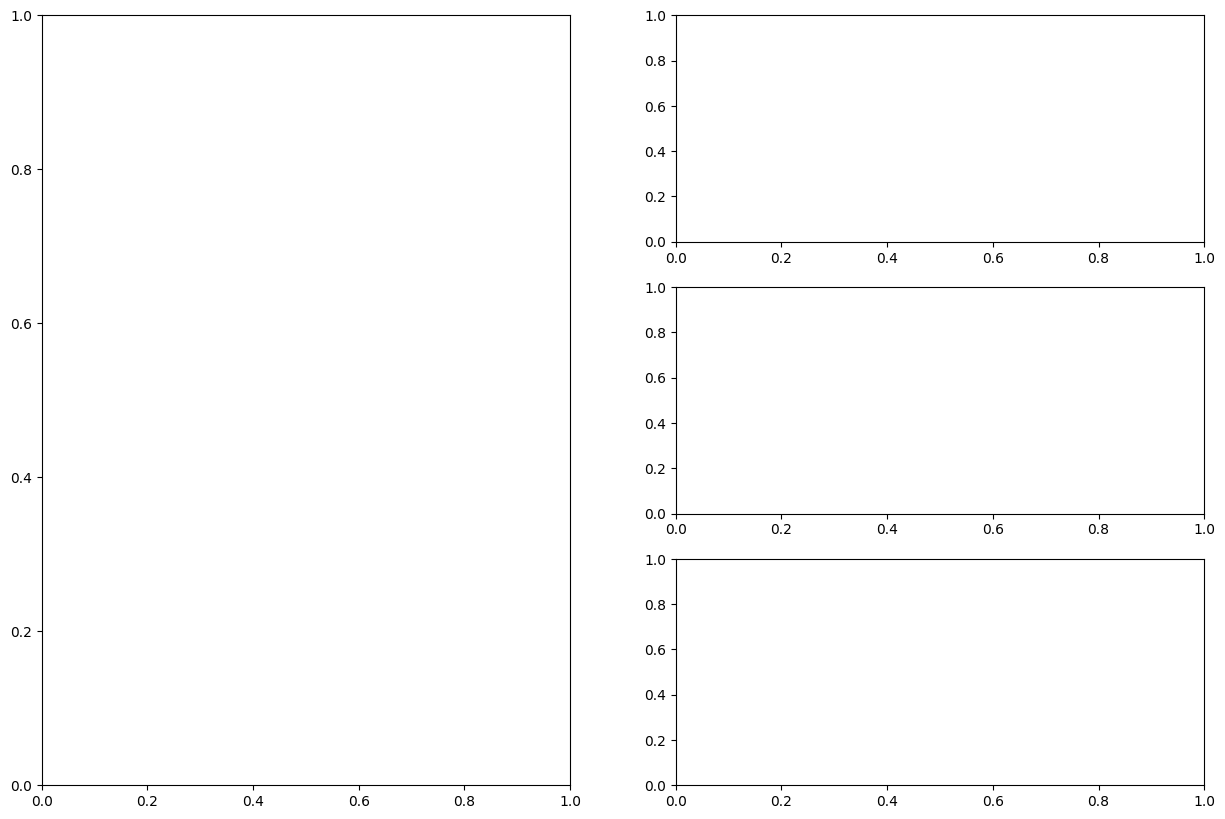

In [ ]:
from IPython.display import HTML
animation = env.unwrapped.visualizer.get_animation()
print(f"Please wait for the animation to be rendered. Estimated total wait time: {len(env.unwrapped.v_buffer) * 0.25:.1f} s. ")
display(HTML(animation.to_html5_video()))

2025-05-08 10:44:48.742 | DEBUG    | gym_carla.envs.barc.barc_env:reset:181 - Respawning at fixed location.


self.m is  2


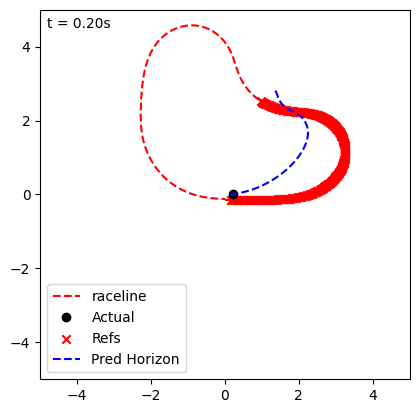

[MPC] Solver failed: Error in Opti::solve [OptiNode] at .../casadi/core/optistack.cpp:217:
.../casadi/core/optistack_internal.cpp:1334: Assertion "return_success(accept_limit)" failed:
Solver failed. You may use opti.debug.value to investigate the latest values of variables. return_status is 'Infeasible_Problem_Detected'
  X0: [1.70853854 2.17732665 2.98117705 3.16383585]
  Goal: [[ 1.67690018e+00  1.64103247e+00  1.60503423e+00  1.56891968e+00
   1.53270027e+00  1.49638676e+00  1.45999355e+00  1.42352883e+00
   1.38700557e+00  1.35043605e+00  1.31561561e+00  1.28157536e+00
   1.24826431e+00  1.21567803e+00  1.18379070e+00  1.15257739e+00
   1.12204028e+00  1.09213176e+00  1.06286733e+00  1.03420028e+00
   1.00612487e+00  9.78625103e-01  9.51675729e-01  9.25274809e-01
   8.99393866e-01  8.74024136e-01  8.49153284e-01  8.24768439e-01
   8.00857259e-01  7.77403828e-01  7.54411398e-01  7.31857703e-01
   7.09742377e-01  6.88057248e-01  6.66790225e-01  6.45951501e-01
   6.25522336e-01  6.05

IndexError: invalid index to scalar variable.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
# import gym

# —– User-provided pieces —–
# from your_module import Raceline, BicycleModel, MPCController, extract_initial_state

# 1) Set up env, model & controller
seed = 42
raceline = Raceline()
env = gym.make('barc-v0',
               track_name='L_track_barc',
               do_render=False,     # we draw with Matplotlib
               max_n_laps=5,
               in_colab=False)
_, info = env.reset(seed=seed, options={'spawning':'fixed'})

model      = BicycleModel(L=0.25, dt=0.01)
controller = MPCController(model)
current    = extract_initial_state(info['vehicle_state'])
truncated  = False

# 2) Prepare figure
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
# draw the track once
raceline.plot_raceline(ax)
# fix your limits so the view doesn’t jump
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# create the artists we’ll update
actual_dot, = ax.plot([], [], 'ko',   label='Actual')
ref_xs, ref_ys = [], []
refs_scatter = ax.scatter(ref_xs, ref_ys, c='r', marker='x', label='Refs')
pred_line,   = ax.plot([], [], 'b--', label='Pred Horizon')
time_text    = ax.text(0.02, 0.95, '', transform=ax.transAxes)
ax.legend()

# 3) The update function
def update(frame):
    global current, truncated, info

    if truncated:
        ani.event_source.stop()
        return actual_dot, refs_scatter, pred_line, time_text

    # — compute MPC goal & solve —
    goal = raceline.get_MPC_reference(
        info['vehicle_state'].p.s,
        controller,
        current[3]            # v
    )
    u, x_pred = controller.solve(current, goal)
    action = np.array([u[1], u[0]])  # [accel, steer]

    # — step the sim —
    _, _, terminated, truncated, info = env.step(action)
    truncated = truncated or terminated
    current = extract_initial_state(info['vehicle_state'])

    # — update artists —
    # actual_dot.set_data(current[0], current[1])
    actual_dot.set_data([current[0]], [current[1]])
    refs_scatter.set_offsets(goal[:2,:].T)    # Nx2 array of (x,y)
    pred_line.set_data(x_pred[0,:], x_pred[1,:])
    time_text.set_text(f"t = {info['vehicle_state'].t:.2f}s")

    return actual_dot, refs_scatter, pred_line, time_text

# 4) Create & run the animation
ani = FuncAnimation(
    fig, update,
    frames=500,        # or some upper bound; it will stop early on truncated
    blit=True,
    interval=100       # ms between frames
)

# preview
plt.show()

# save as GIF (needs pillow)
ani.save("mpc_rollout.gif", writer=PillowWriter(fps=10))

